In [1]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def Relevance(word,outfile):
    plt.figure(figsize = (30,30))
    plt.scatter(embedd[:,0],embedd[:,1])
    a = tmp.index(word)
    y = embedd[a]
    i = 0
    while i < n_clusters_:
        x[i] = embedd[label_pred == i]
        if y in x[i]:
            plt.scatter(x[i][:, 0], x[i][:, 1], c='r')
            break
        i += 1
    plt.savefig(outfile)
    plt.show()
    
def Feature(infile,outfile):
    relevance = pd.read_csv(infile)
    res = list(relevance['相关度'])
    words = list(relevance['化学式'])
    i = 0
    x=[]
    y=[]
    r=[]
    for word in words:
        if word in tmp:
            r.append(res[i])
            a = tmp.index(word)
            x.append(embedd[a,0])
            y.append(embedd[a,1])
        i += 1
    plt.figure(figsize = (30,30))
    cmap=plt.cm.Purples
    plt.scatter(x,y,c=r,cmap=cmap,s=50)
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    plt.savefig(outfile)
    plt.show()

In [24]:
tsne = TSNE(n_components=2,early_exaggeration=12.0,learning_rate=200,n_iter=10000, init='pca')

dbscan = DBSCAN(eps=3.5, min_samples=8)

In [25]:
model = Word2Vec.load('./model/word2vec_battery.model')
data = pd.read_csv('./data/battery/tmp.txt', sep='\t', header=None, names=['化学式'])
tmp = list(data['化学式'])

vectors = model[tmp]
embedd = tsne.fit_transform(vectors)

dbscan.fit(embedd)
label_pred = dbscan.labels_

n_clusters_ = len(set(label_pred)) - (1 if -1 in label_pred else 0)

<ipython-input-25-5a8de5517834>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = model[tmp]


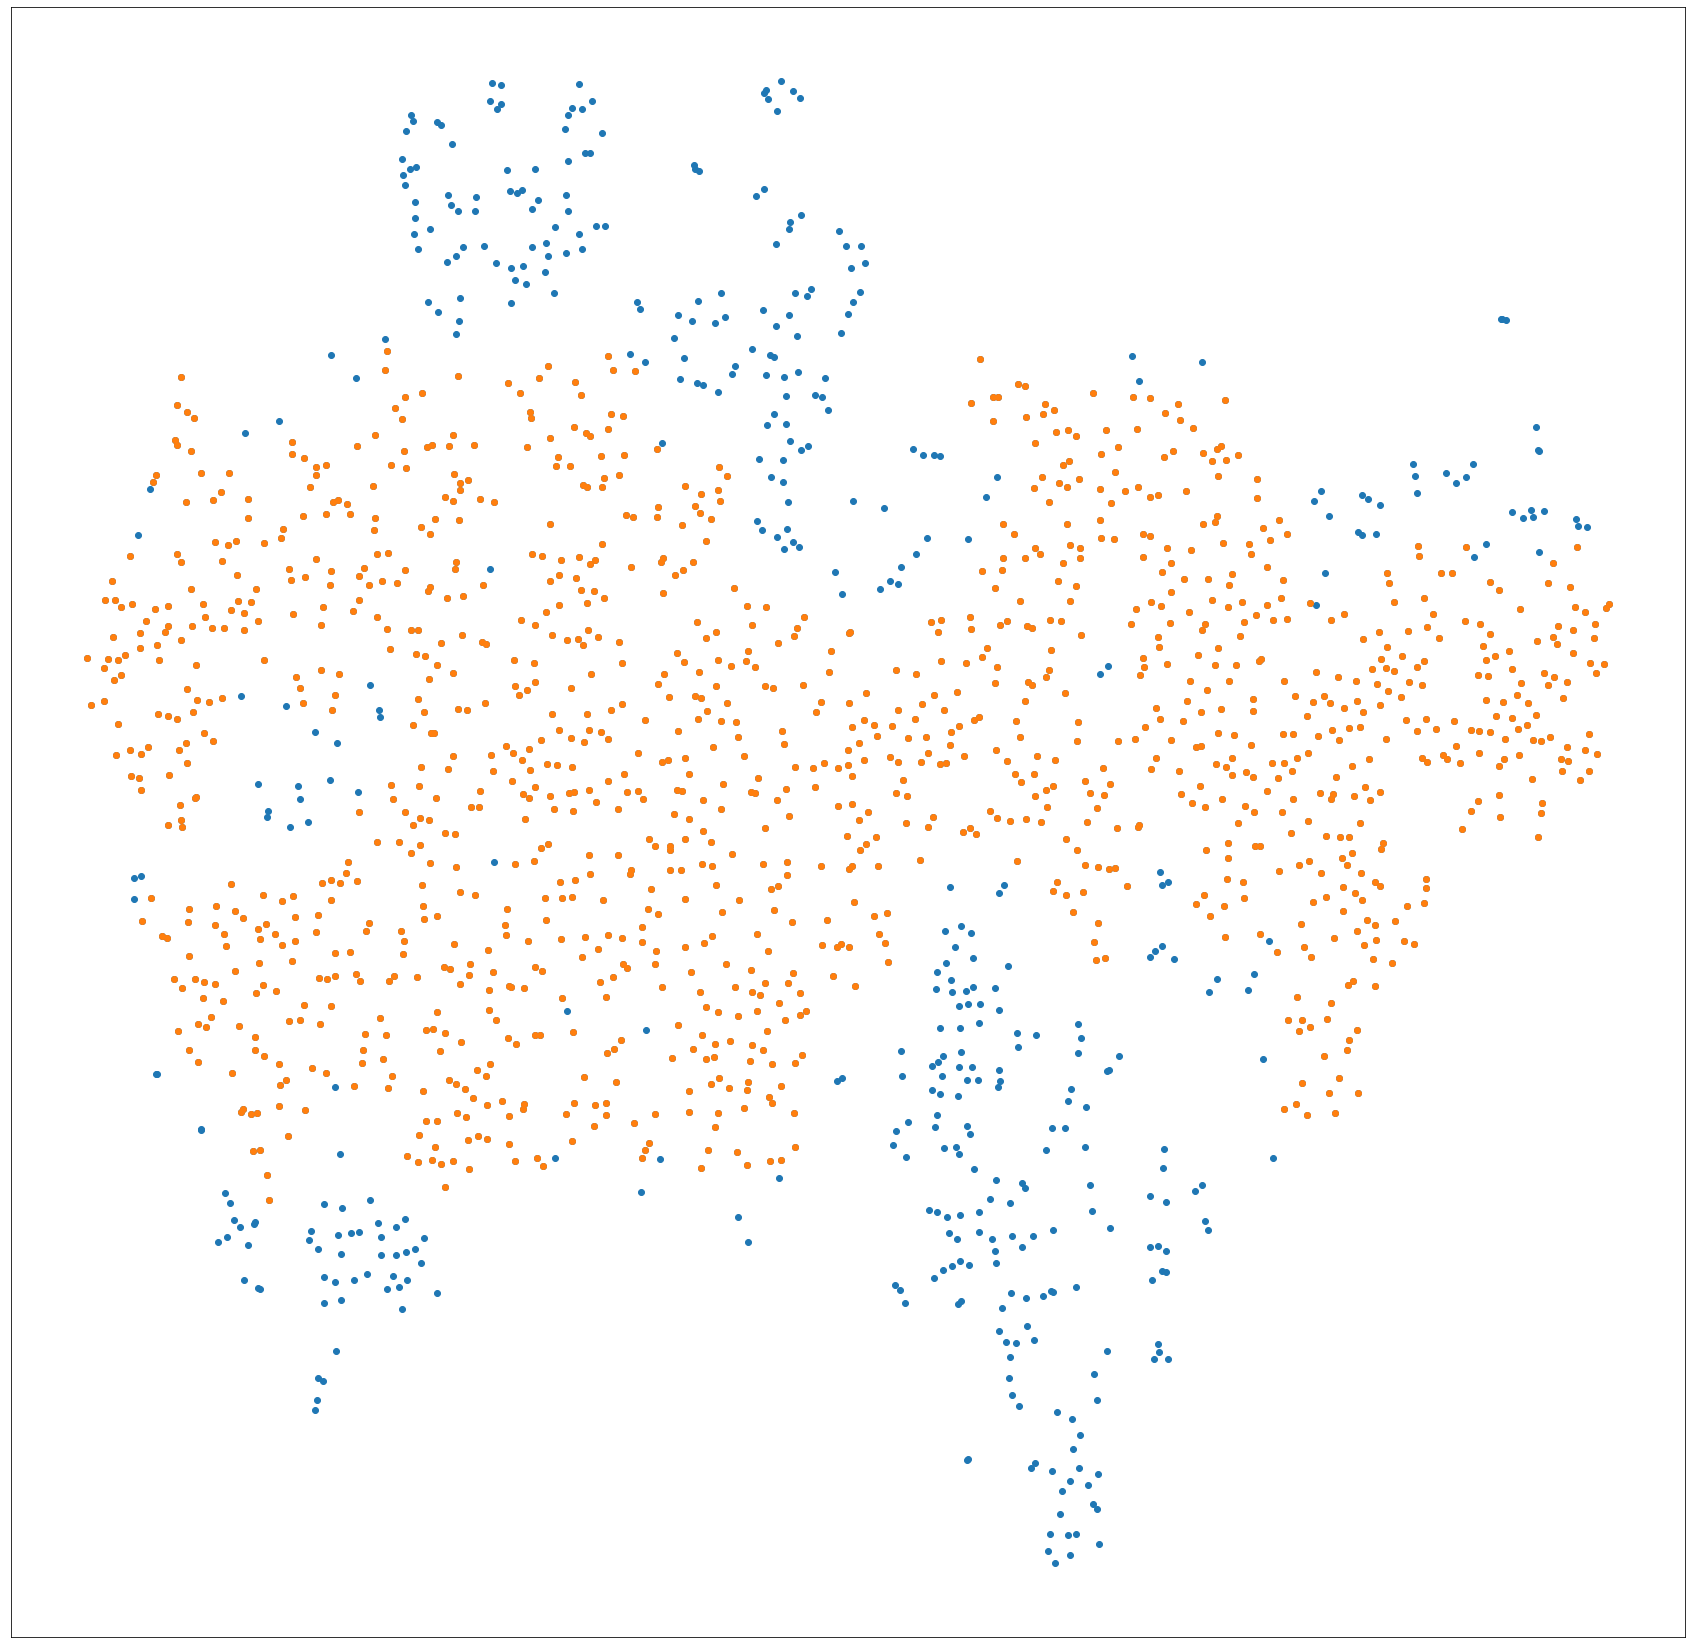

In [26]:
plt.figure(figsize = (30,30))
plt.scatter(embedd[:,0],embedd[:,1])
x = {}
i = 0
while i<n_clusters_:
    x[i] = embedd[label_pred == i]
    if len(x[i])>100:
        plt.scatter(x[i][:, 0], x[i][:, 1])
    i += 1

plt.xticks([])
plt.yticks([])
plt.show()

In [99]:
words = model.wv.index2word

A = pd.read_csv('./data/anode/tmp.txt', header=None, names=['anode'])
words_A = list(A['anode'])
tmp_A = [val for val in words_A if val in words]
vectors_A = model[tmp_A]
embedd_A = tsne.fit_transform(vectors_A)

E = pd.read_csv('./data/electrolyte/tmp.txt', header=None, names=['electrolyte'])
words_E = list(E['electrolyte'])
tmp_E = [val for val in words_E if val in words]
vectors_E = model[tmp_E]
embedd_E = tsne.fit_transform(vectors_E)

C = pd.read_csv('./data/cathode/tmp.txt', header=None, names=['cathode'])
words_C = list(C['cathode'])
tmp_C = [val for val in words_C if val in words]
vectors_C = model[tmp_C]
embedd_C = tsne.fit_transform(vectors_C)


<ipython-input-99-d42a43c859fb>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors_A = model[tmp_A]
<ipython-input-99-d42a43c859fb>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors_E = model[tmp_E]
<ipython-input-99-d42a43c859fb>:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors_C = model[tmp_C]


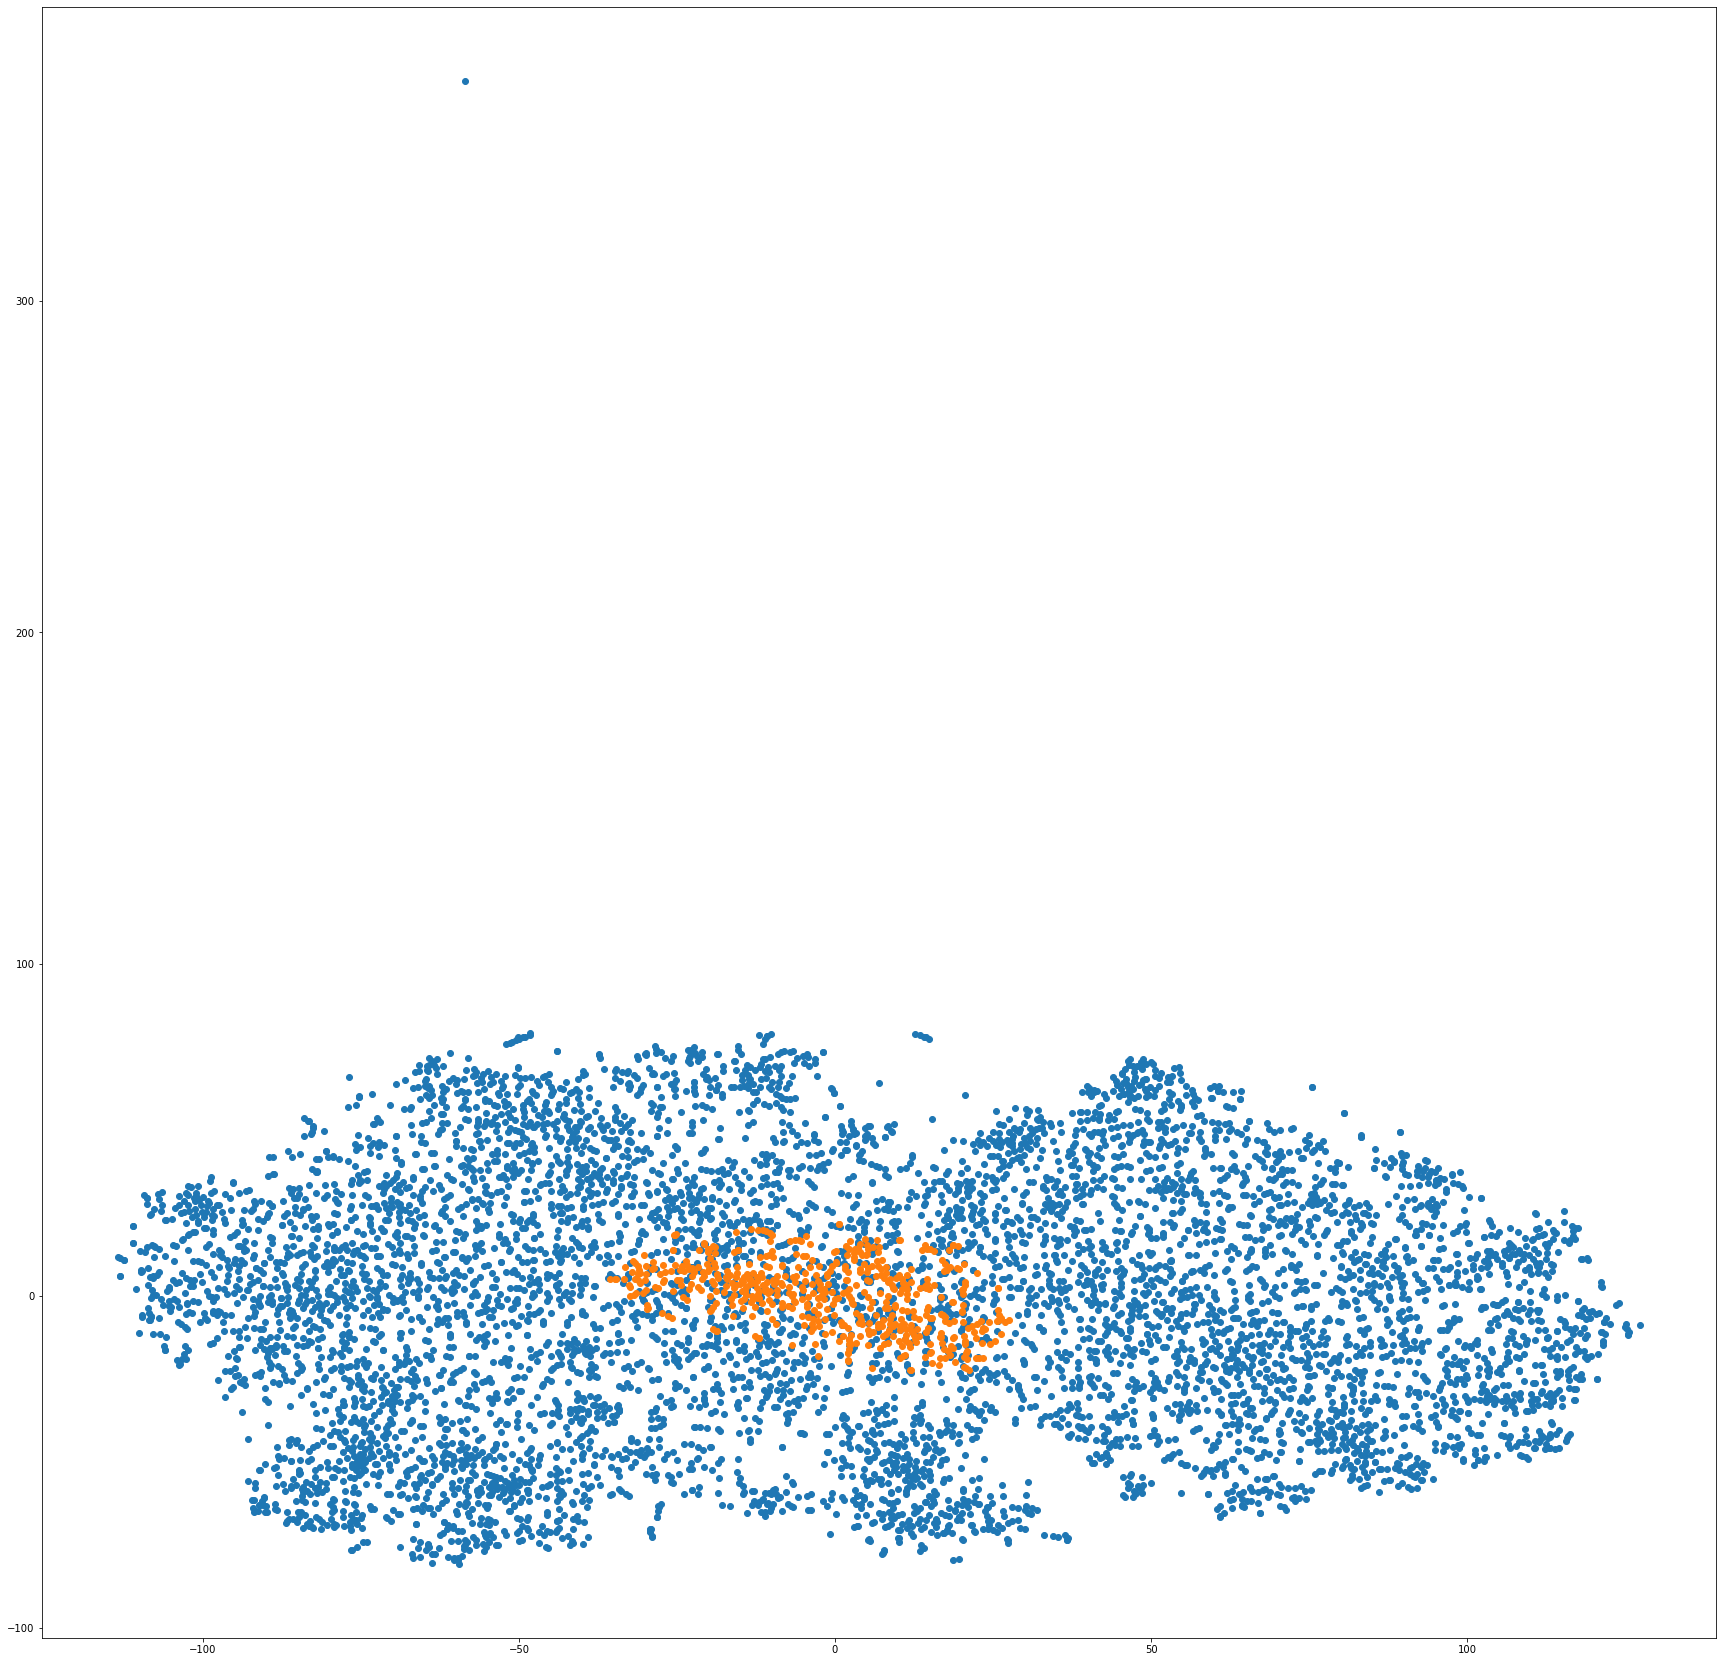

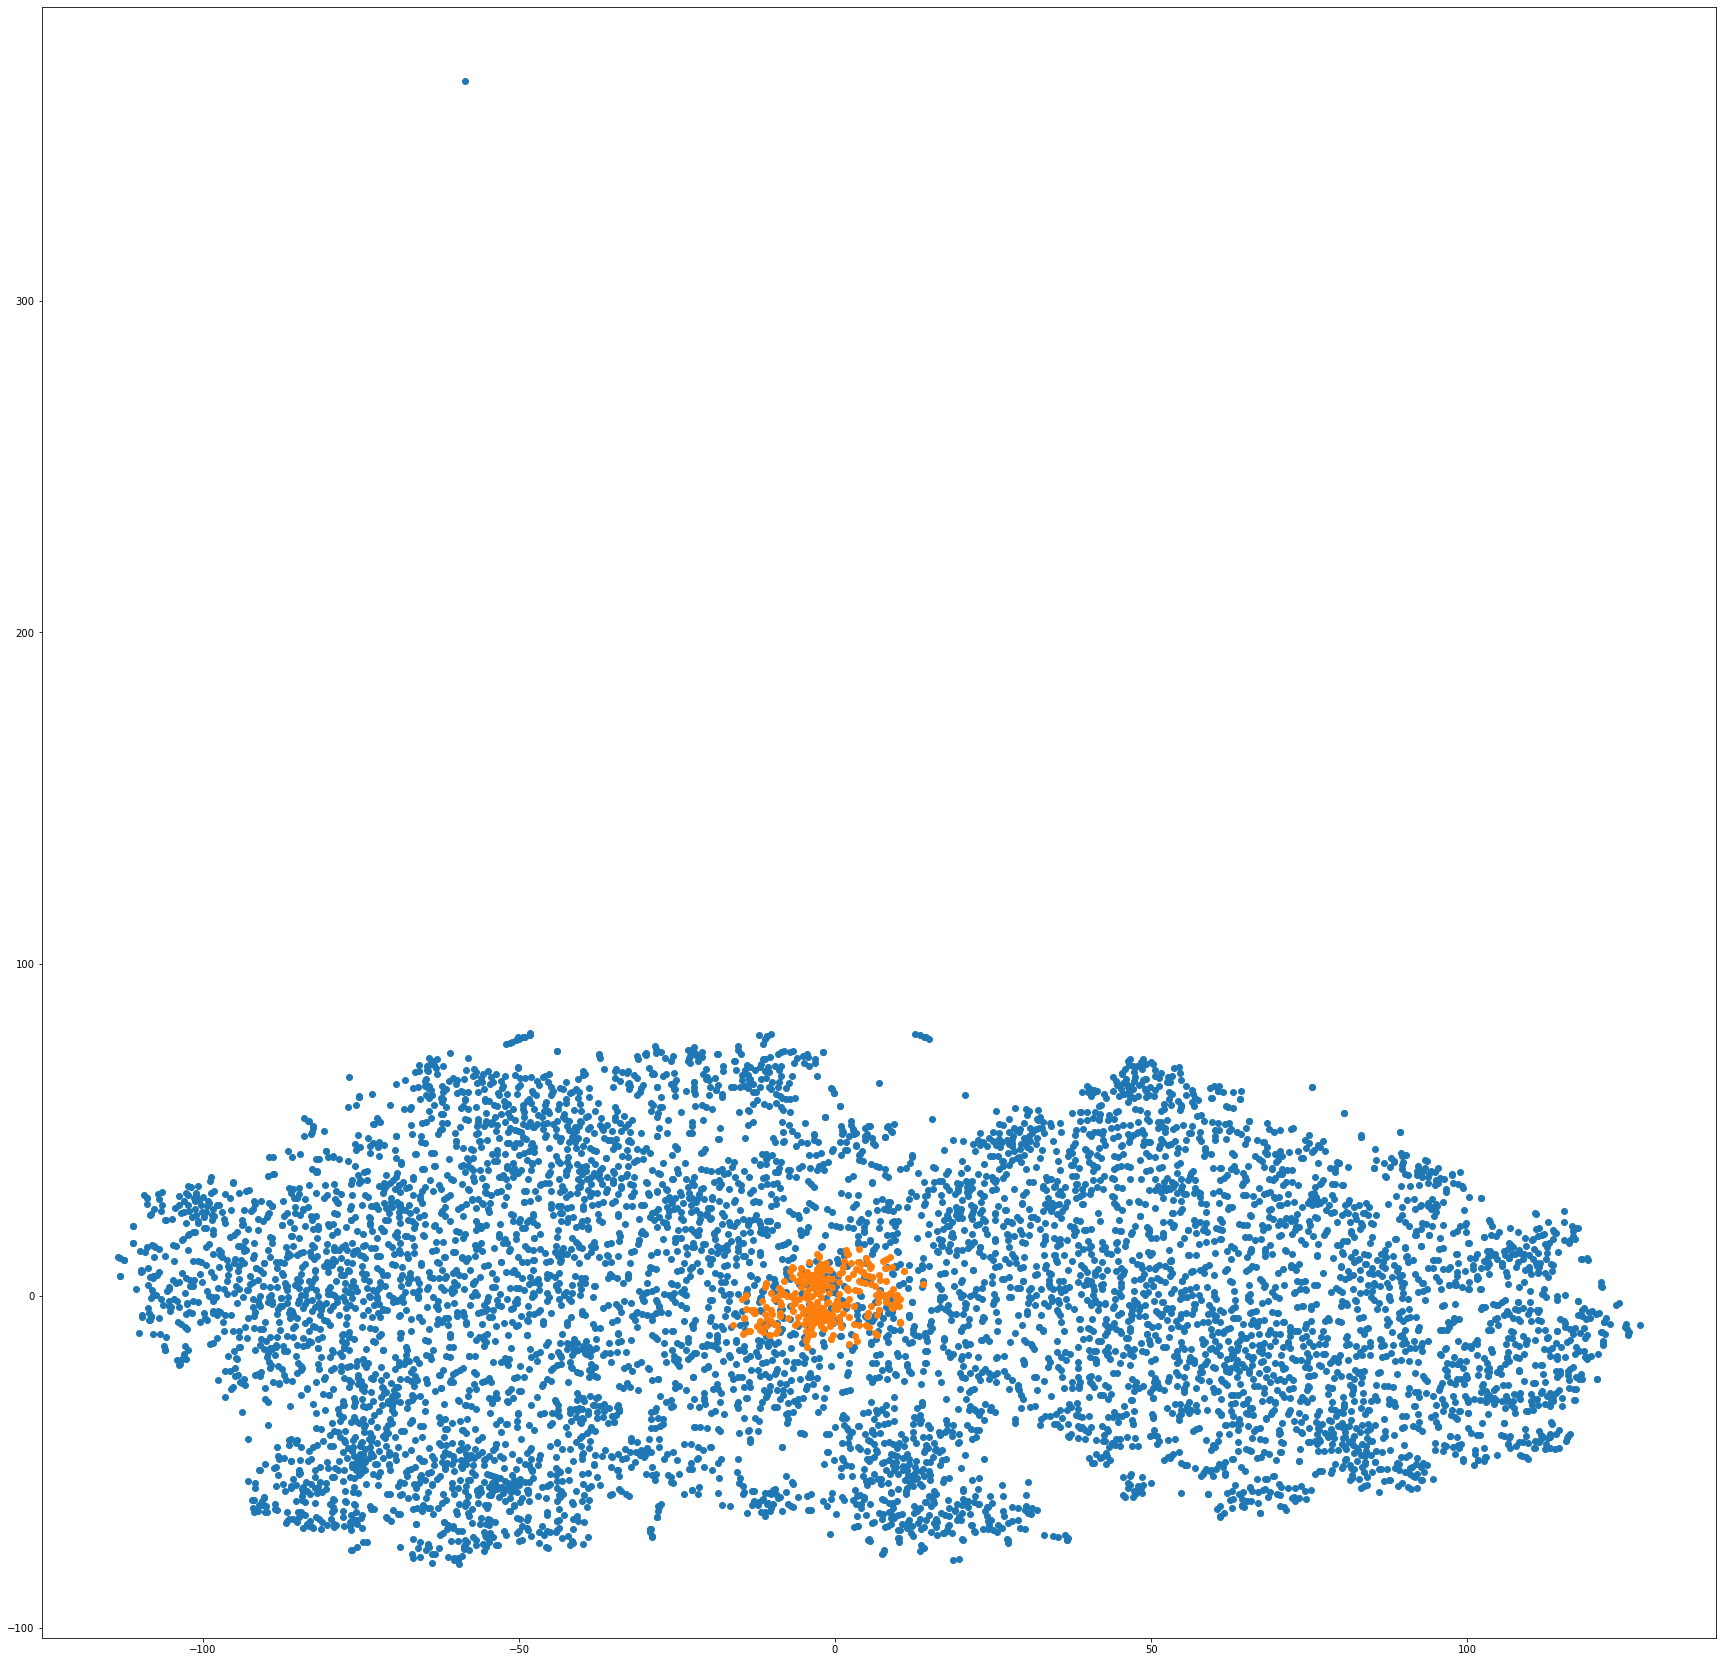

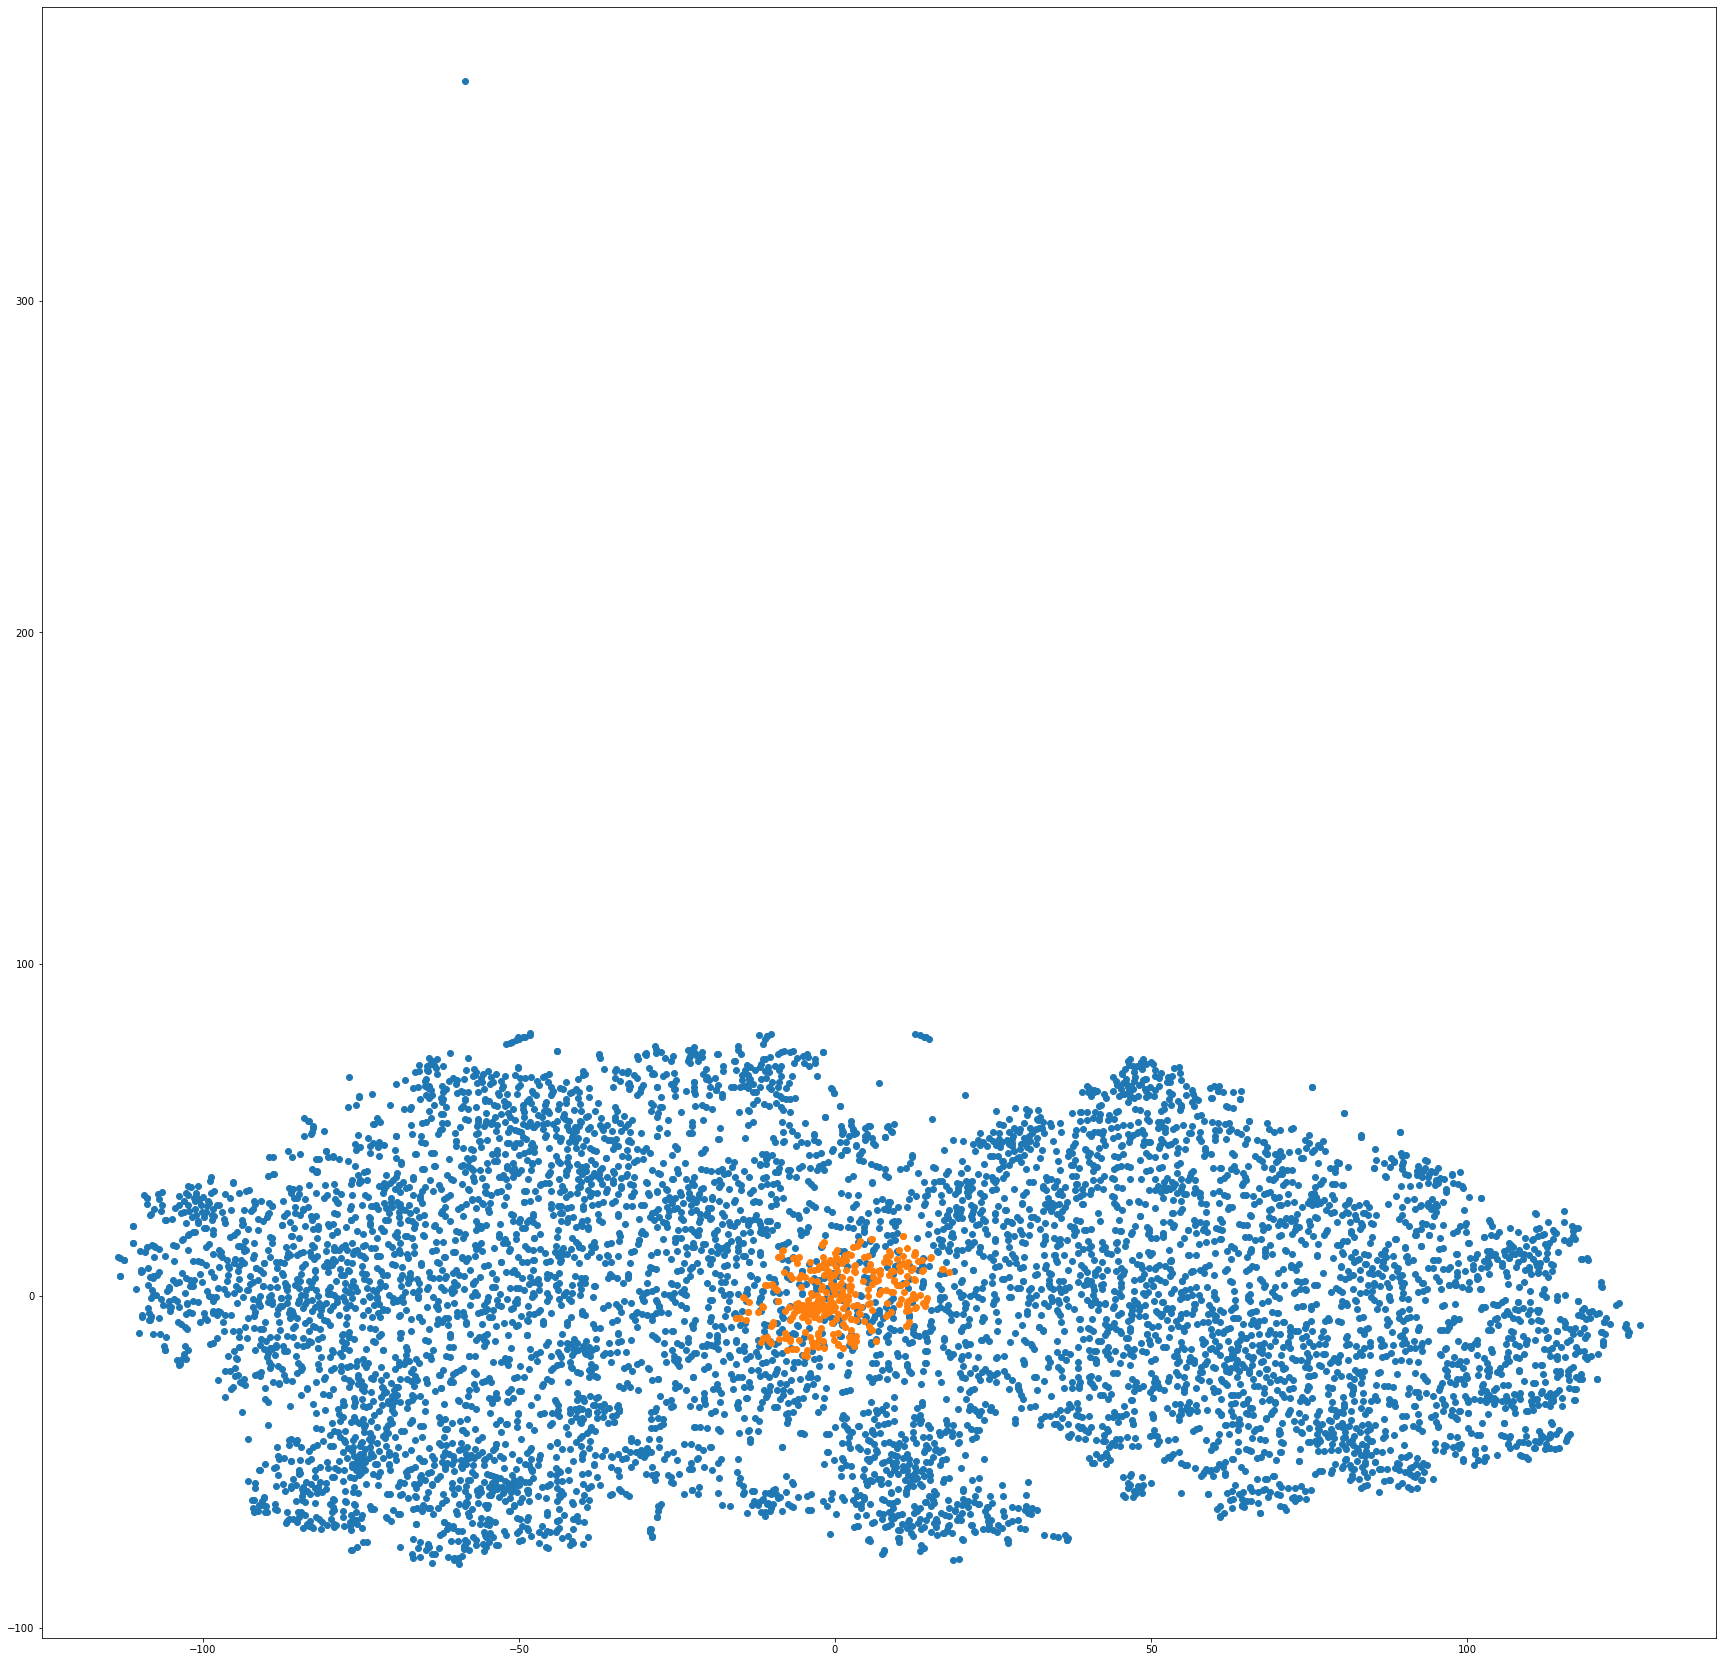

In [83]:
plt.figure(figsize = (30,30))
plt.scatter(embedd[:,0],embedd[:,1])
plt.scatter(embedd_E[:,0],embedd_E[:,1])
plt.show()

plt.figure(figsize = (30,30))
plt.scatter(embedd[:,0],embedd[:,1])
plt.scatter(embedd_C[:,0],embedd_C[:,1])
#plt.savefig('./data/battery/图片/电极.jpg')
plt.show()

plt.figure(figsize = (30,30))
plt.scatter(embedd[:,0],embedd[:,1])
plt.scatter(embedd_A[:,0],embedd_A[:,1])
plt.show()

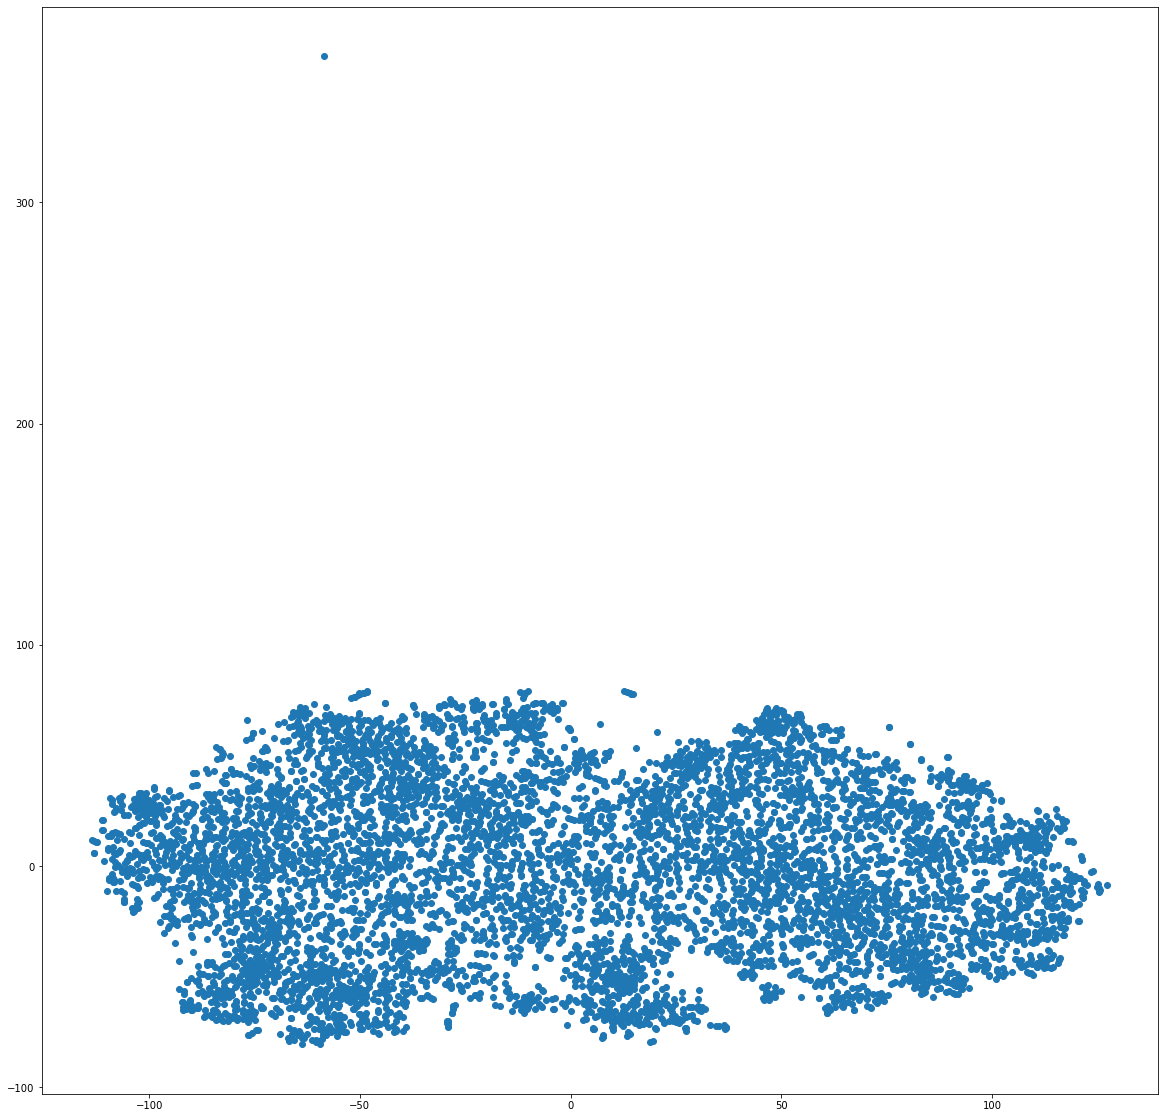

In [84]:
plt.figure(figsize = (20,20))
plt.scatter(embedd[:,0],embedd[:,1])
plt.show()

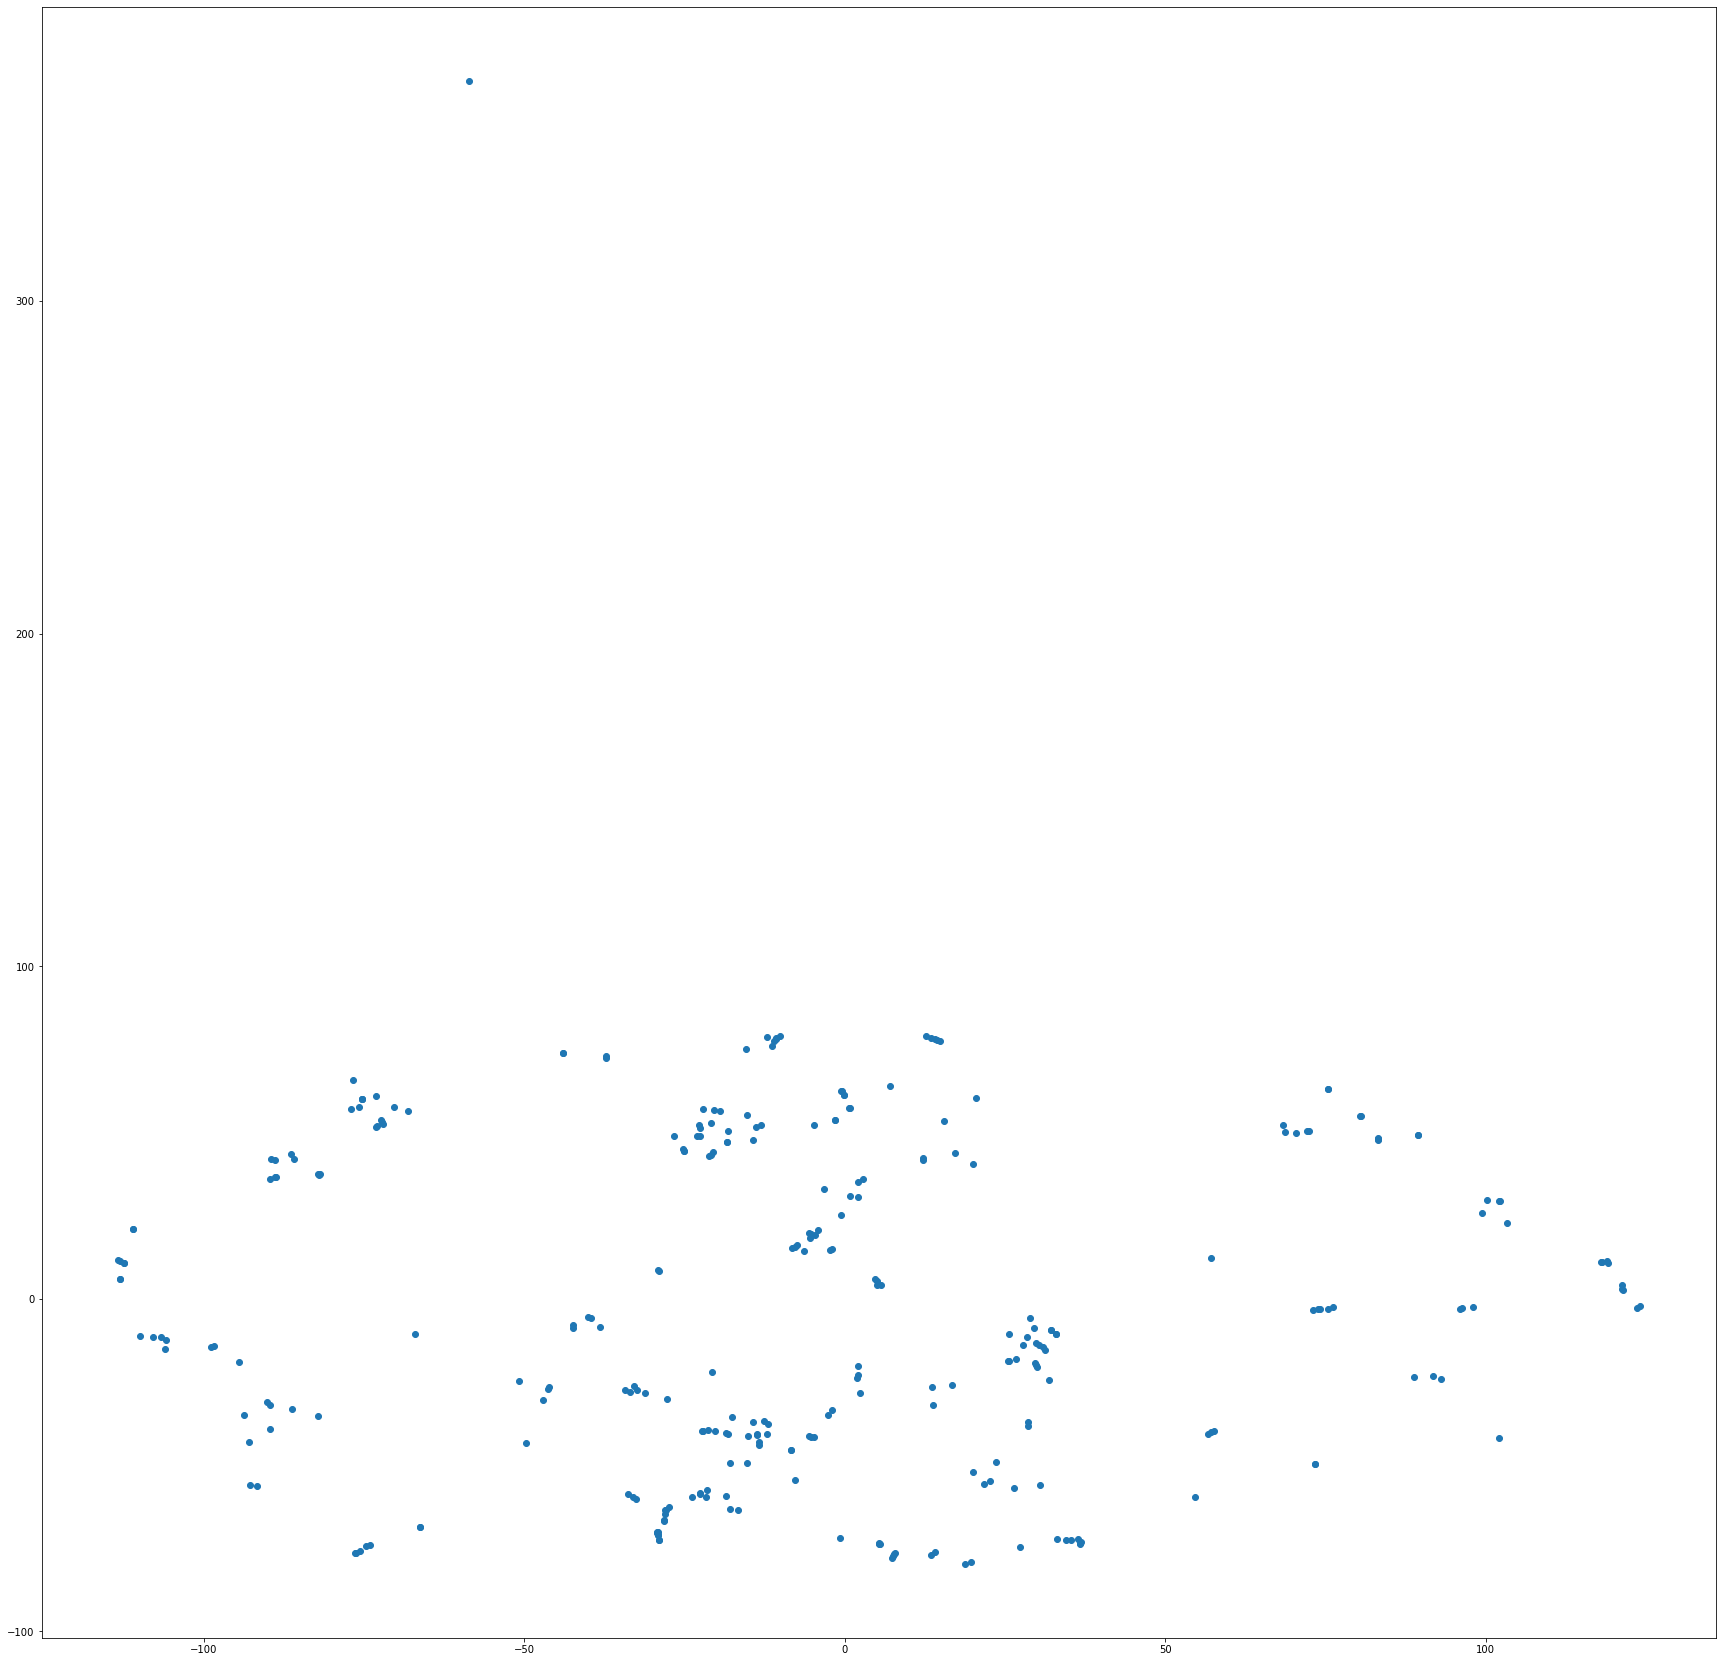

In [85]:
plt.figure(figsize = (30,30))
y = embedd[label_pred == -1]
plt.scatter(y[:, 0], y[:, 1])

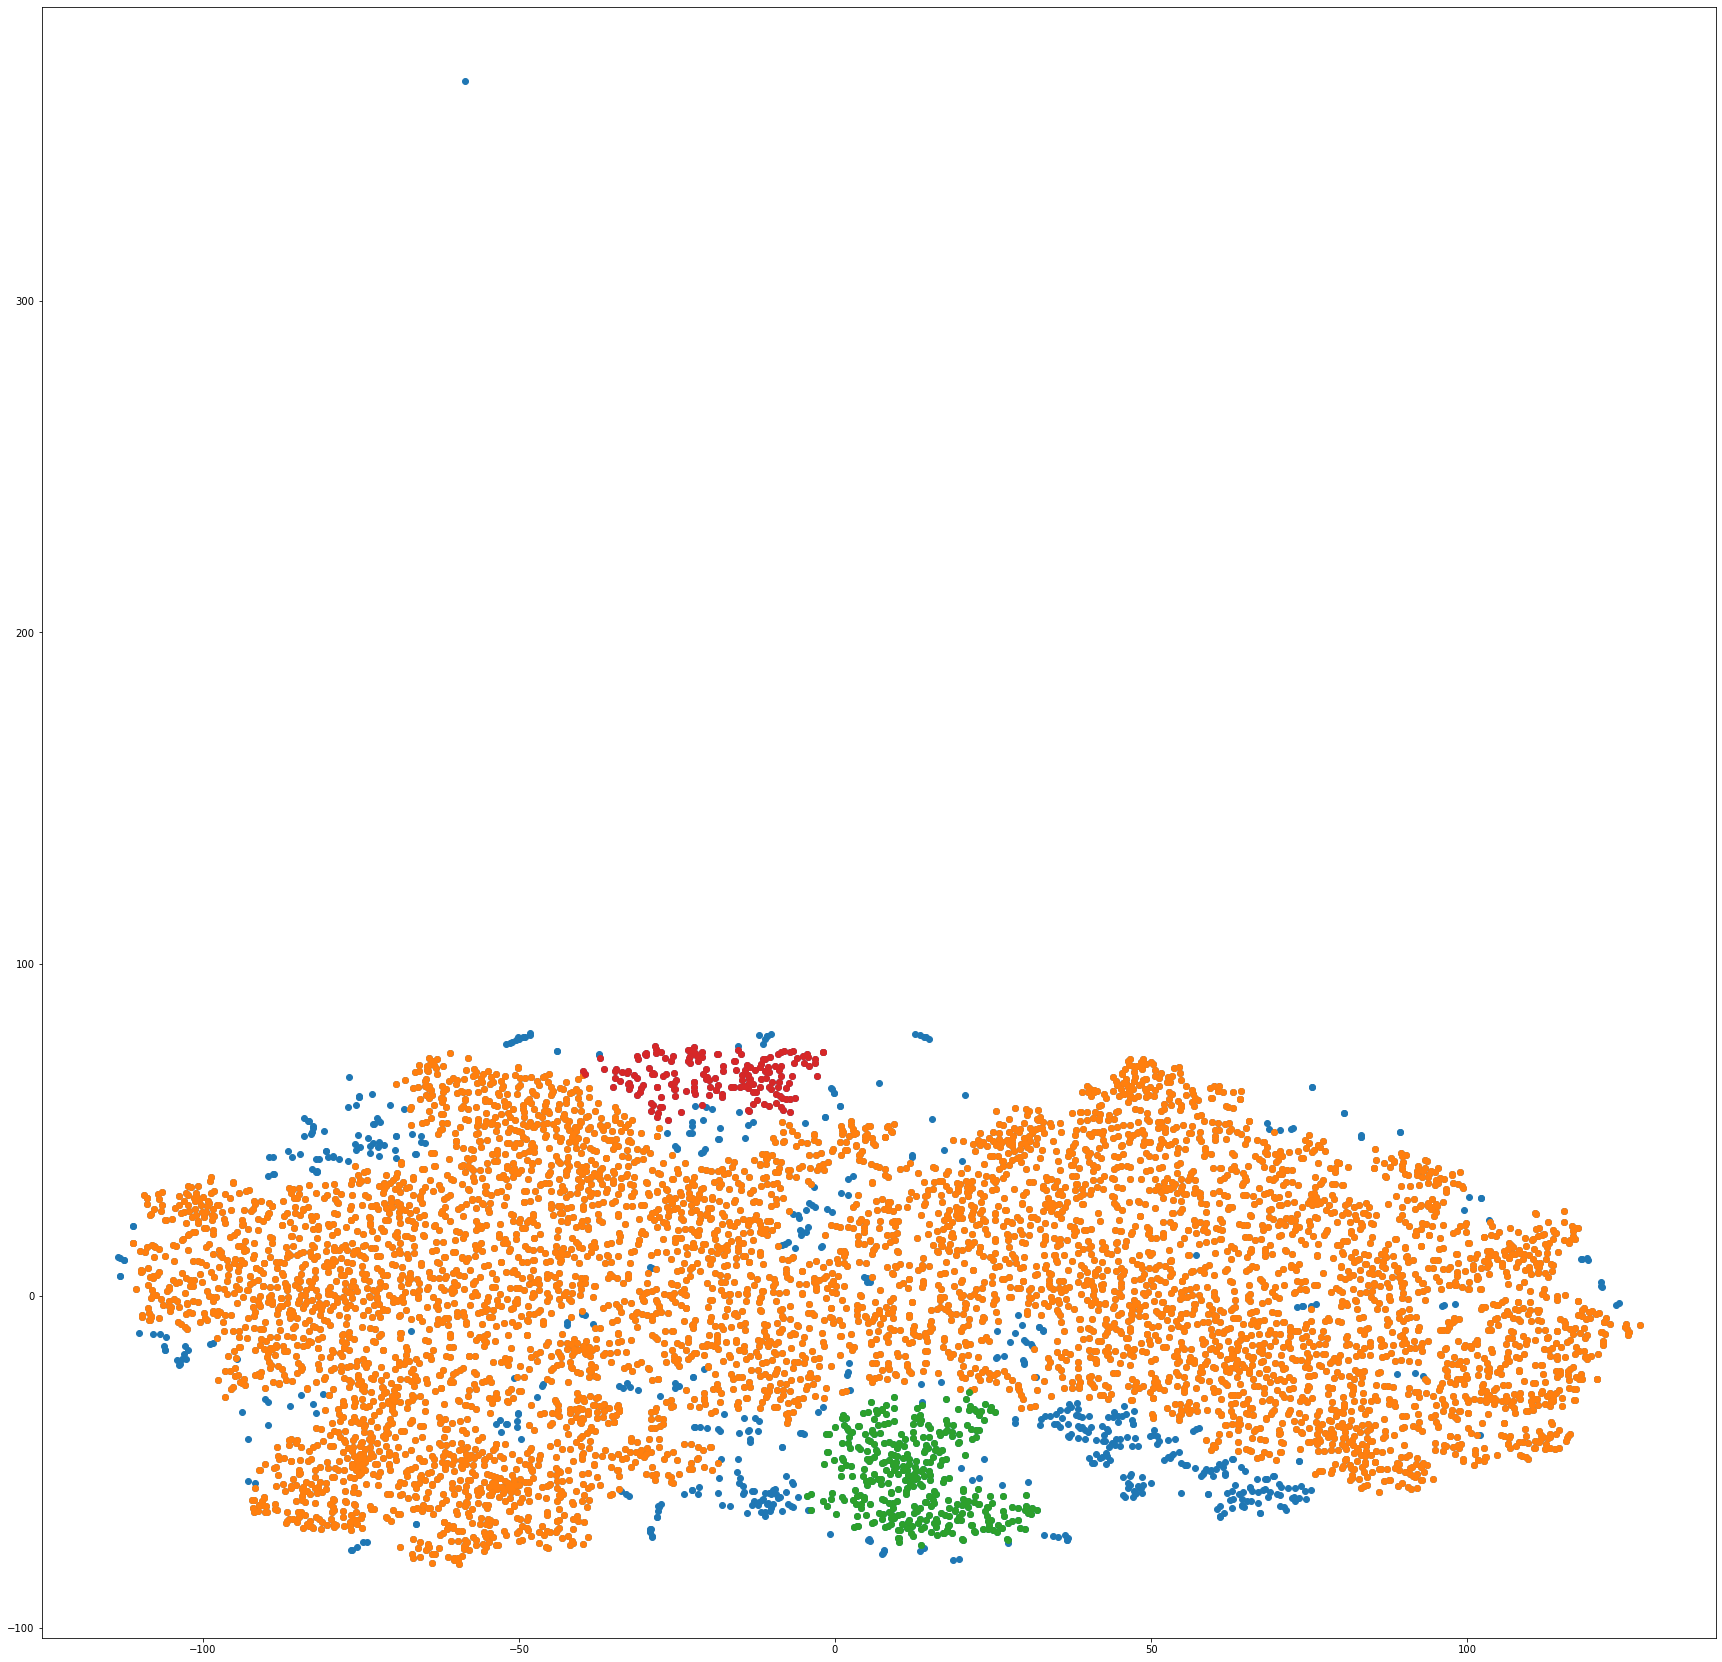

In [86]:
plt.figure(figsize = (30,30))
plt.scatter(embedd[:,0],embedd[:,1])
x = {}
i = 0
while i<n_clusters_:
    x[i] = embedd[label_pred == i]
    if len(x[i])>100:
        plt.scatter(x[i][:, 0], x[i][:, 1])
    i += 1

    plt.savefig('./data/C/图片/聚集.jpg')
plt.show()

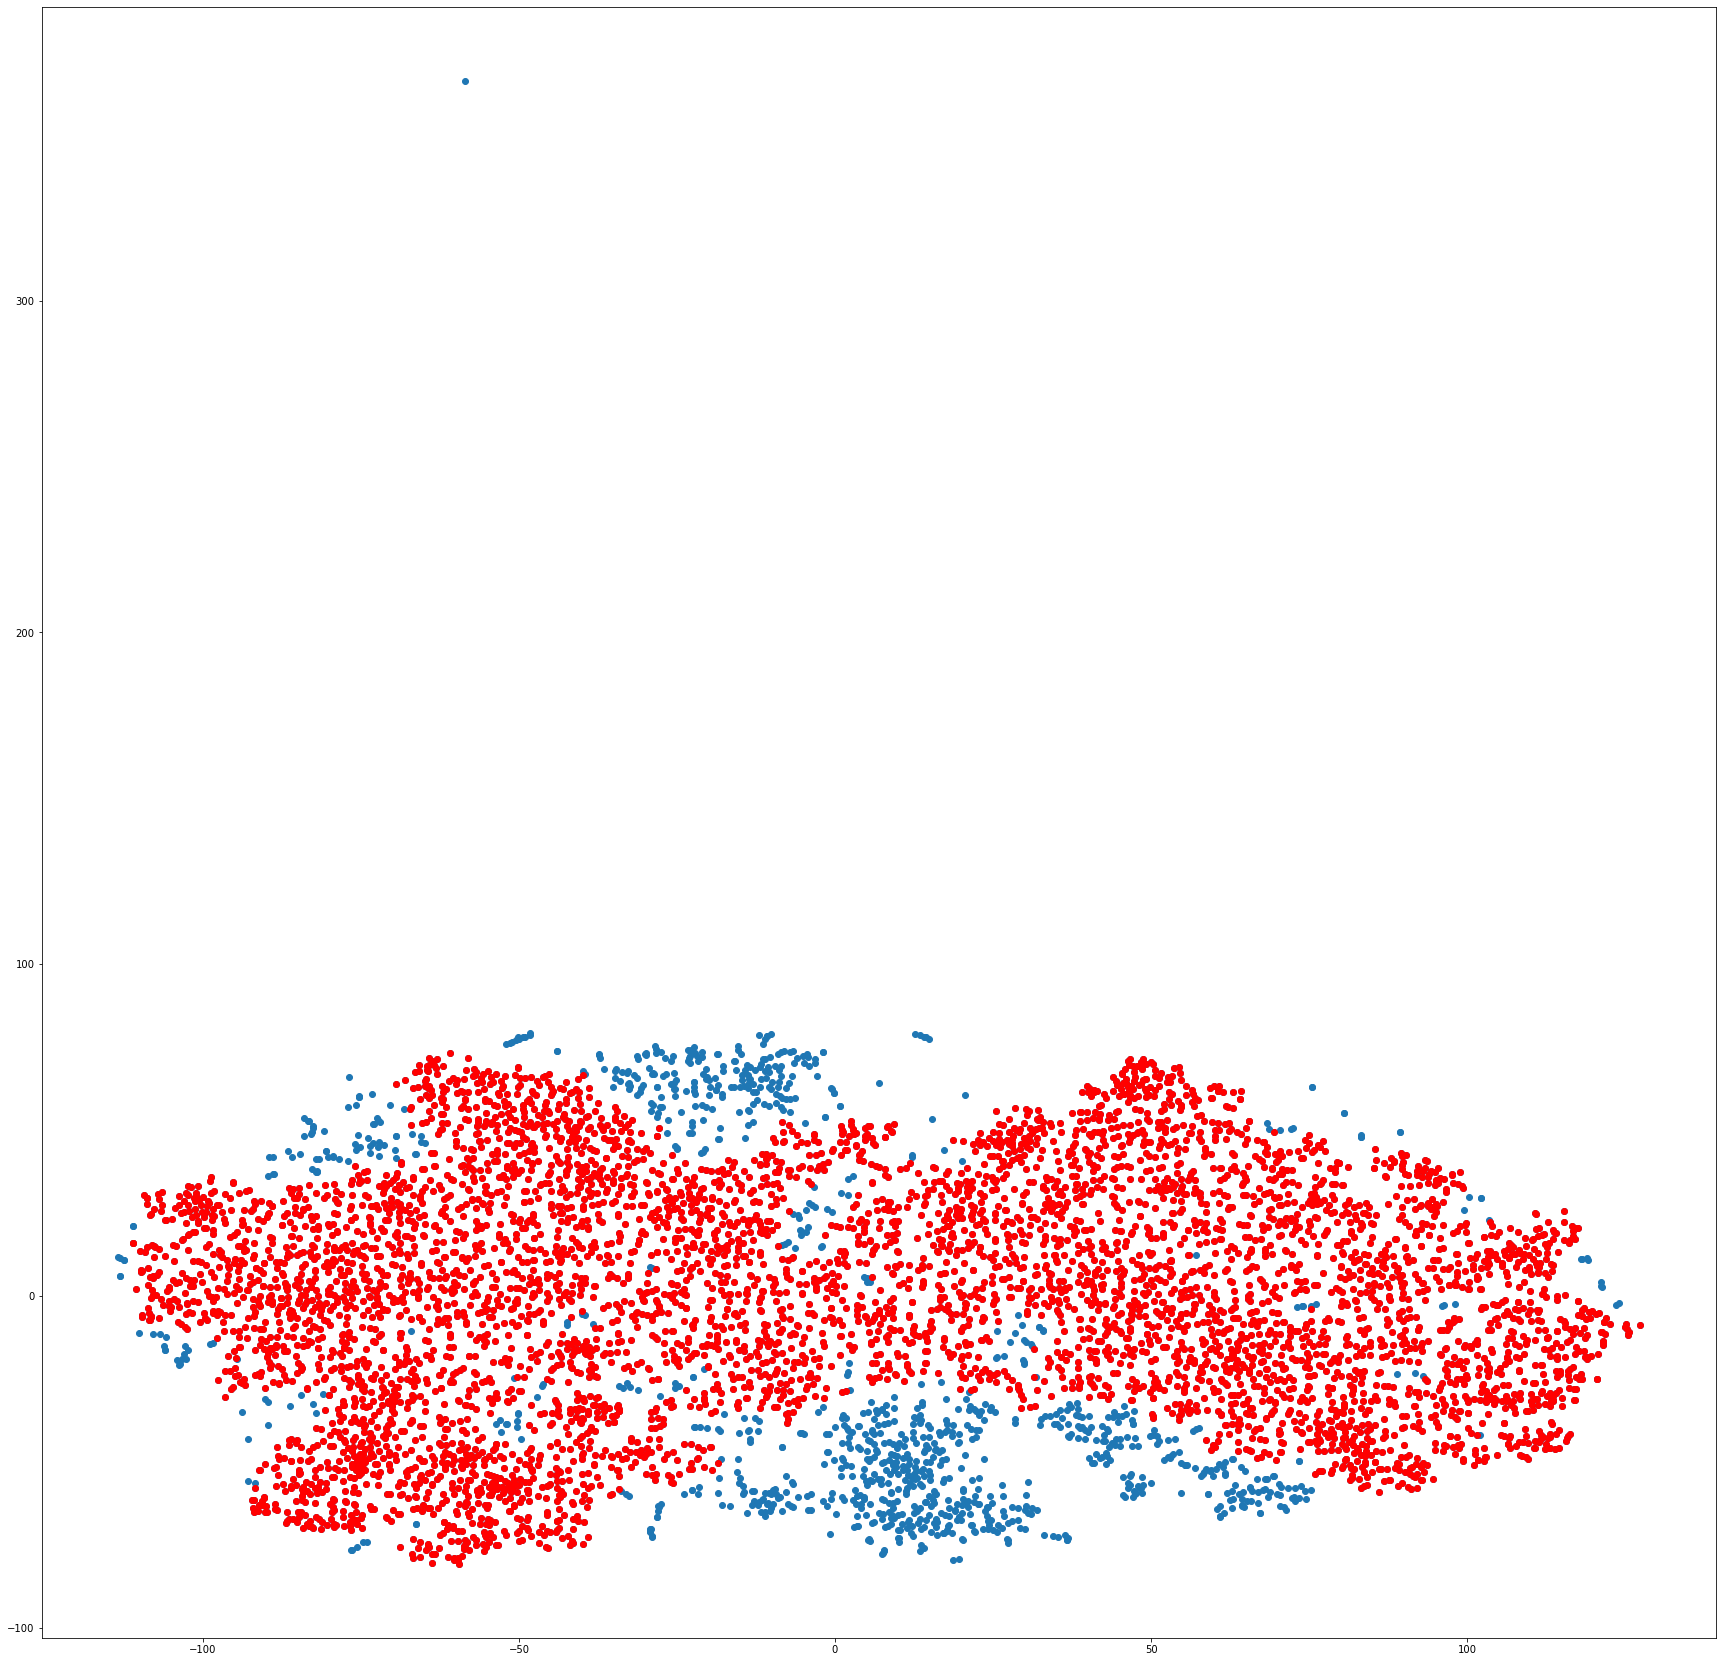

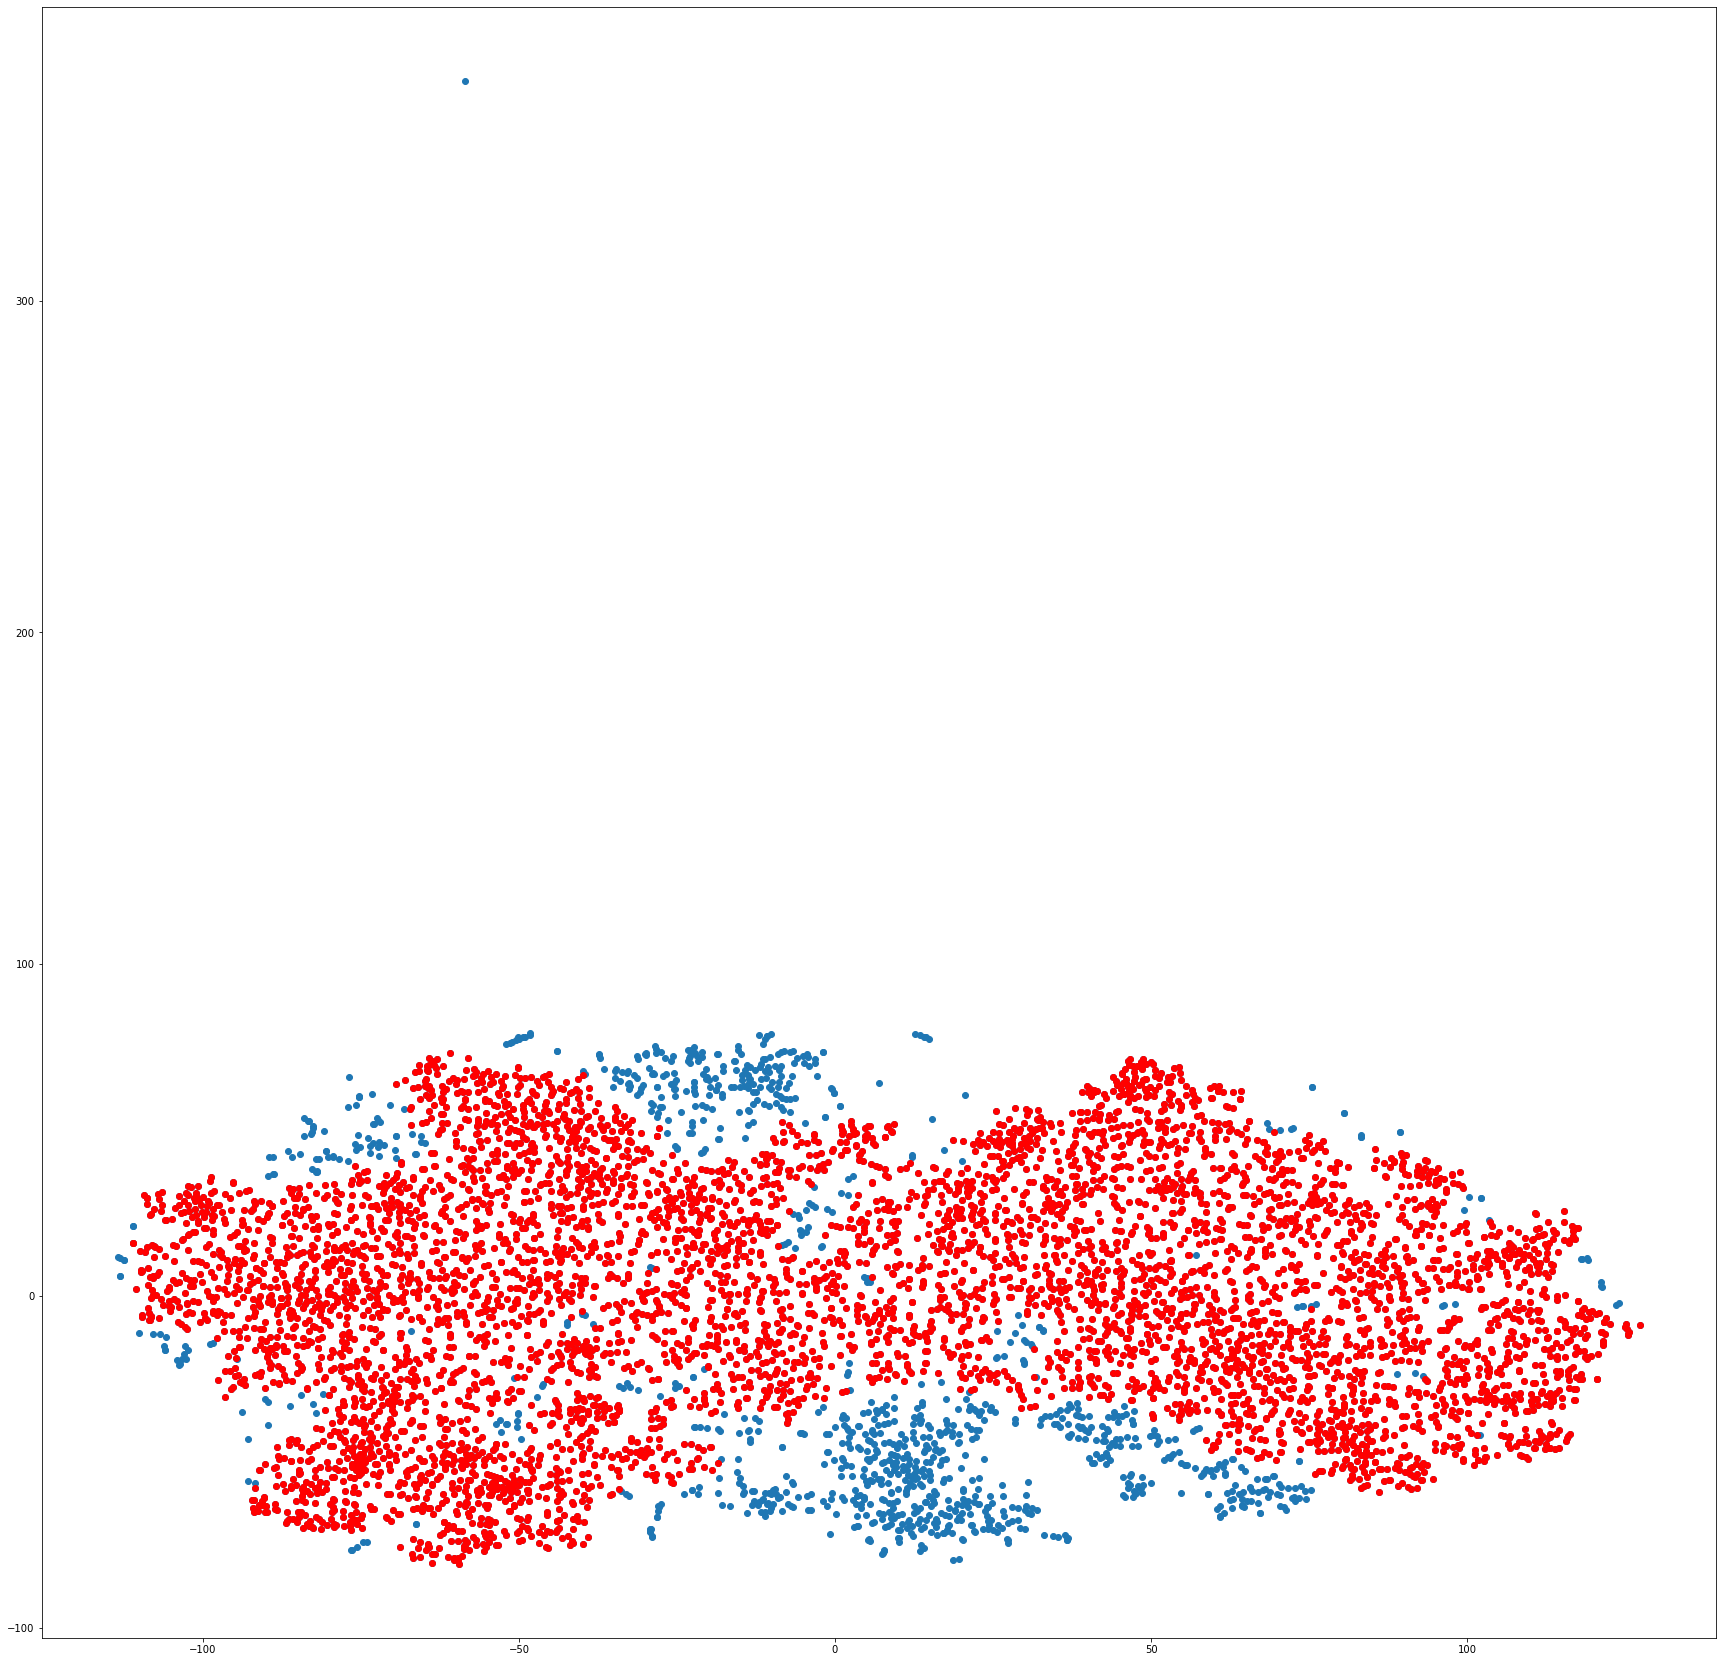

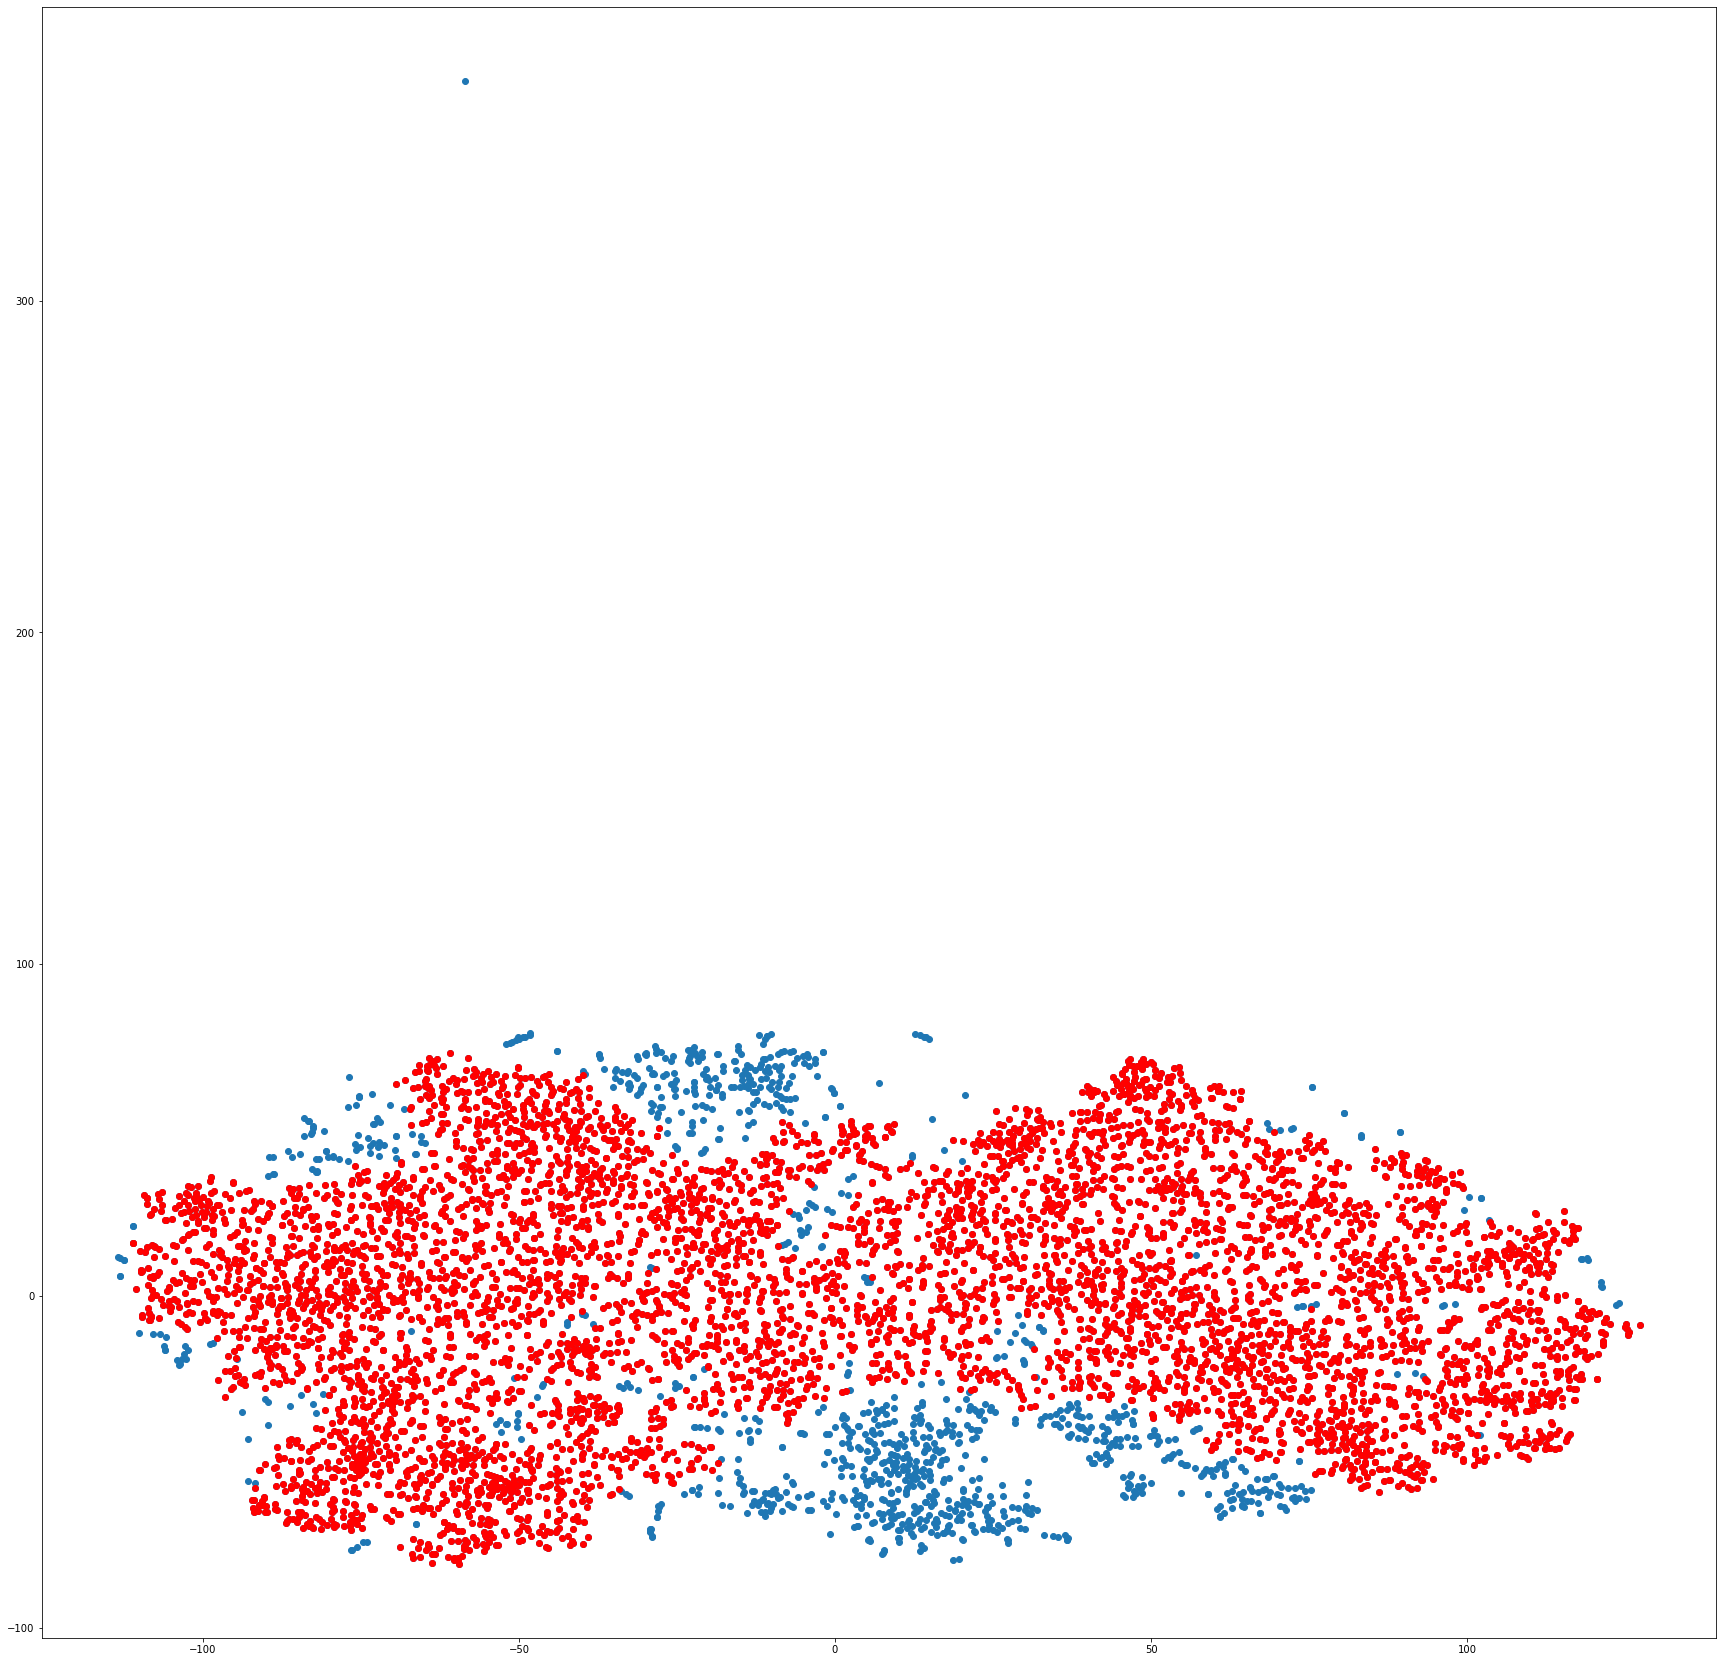

In [87]:
outfile='./data/C/图片/LiFePO4.jpg'
LiFePO4 = Relevance('LiFePO4',outfile)

outfile='./data/C/图片/LiCoO2.jpg'
LiCoO2 = Relevance('LiCoO2',outfile)

outfile='./data/C/图片/Li4Ti5O12.jpg'
Li4Ti5O12 = Relevance('Li4Ti5O12',outfile)


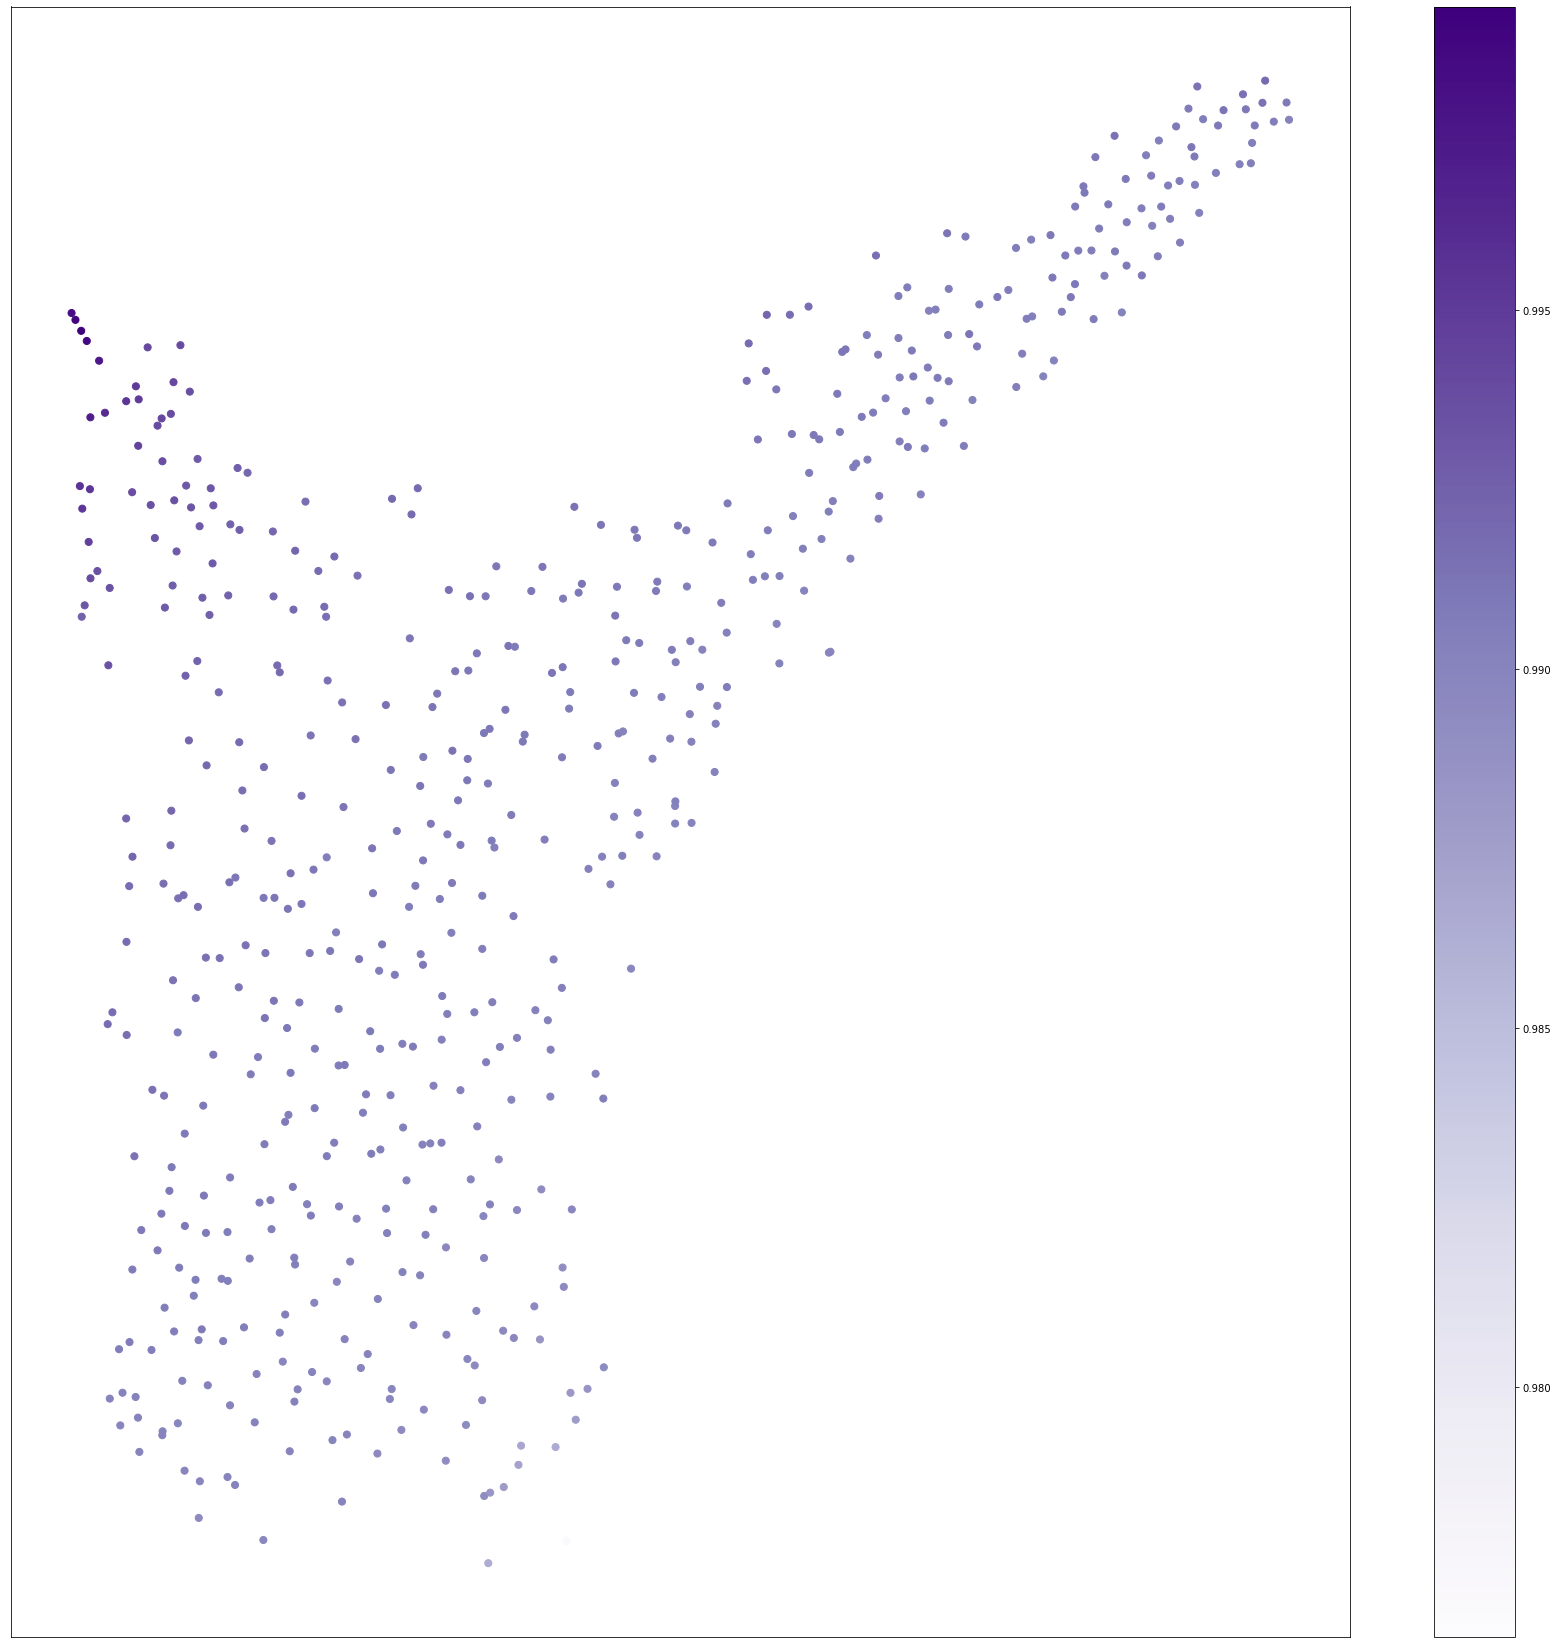

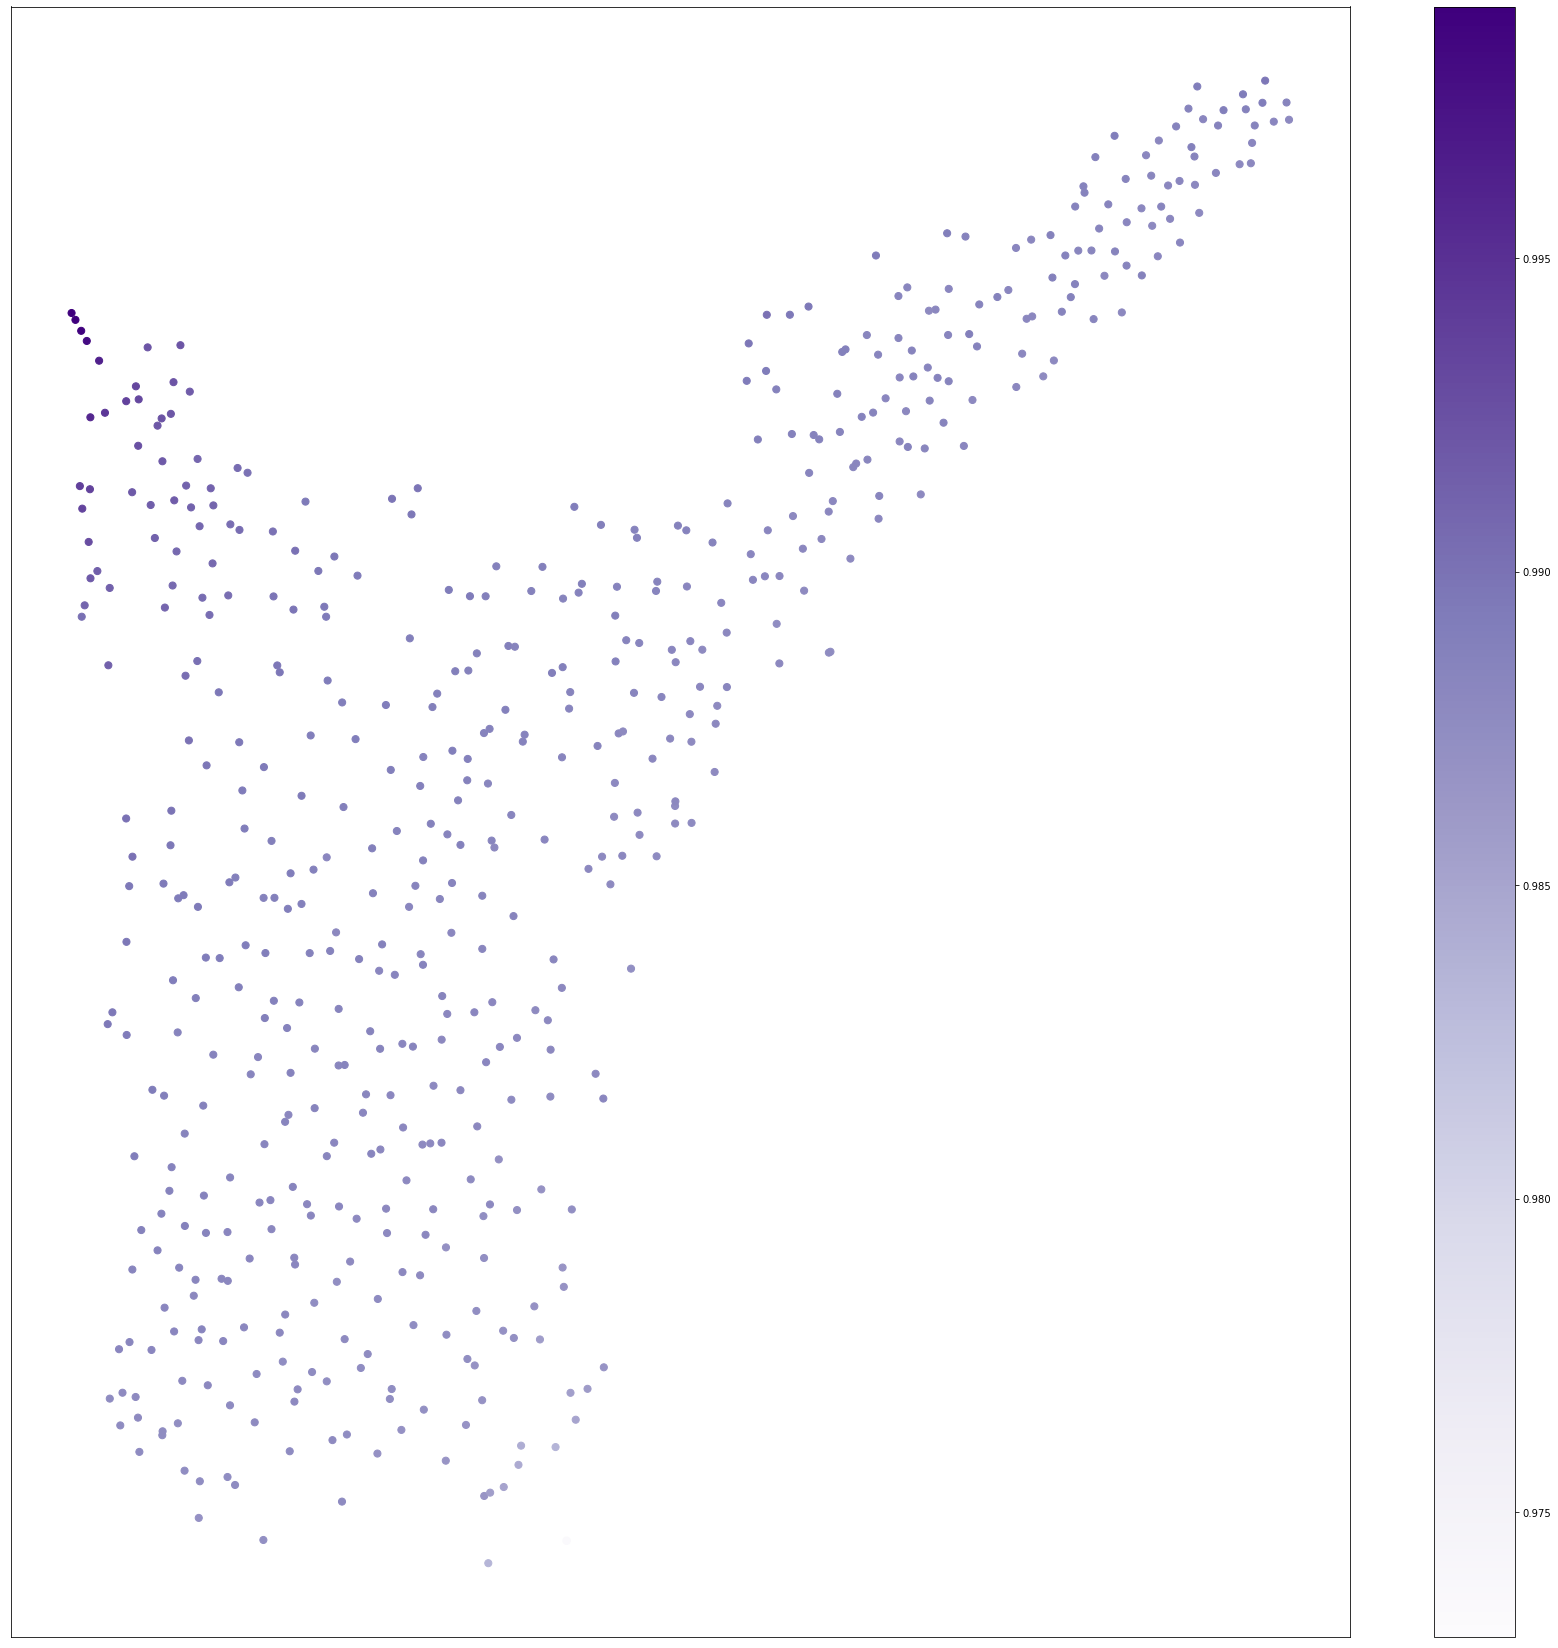

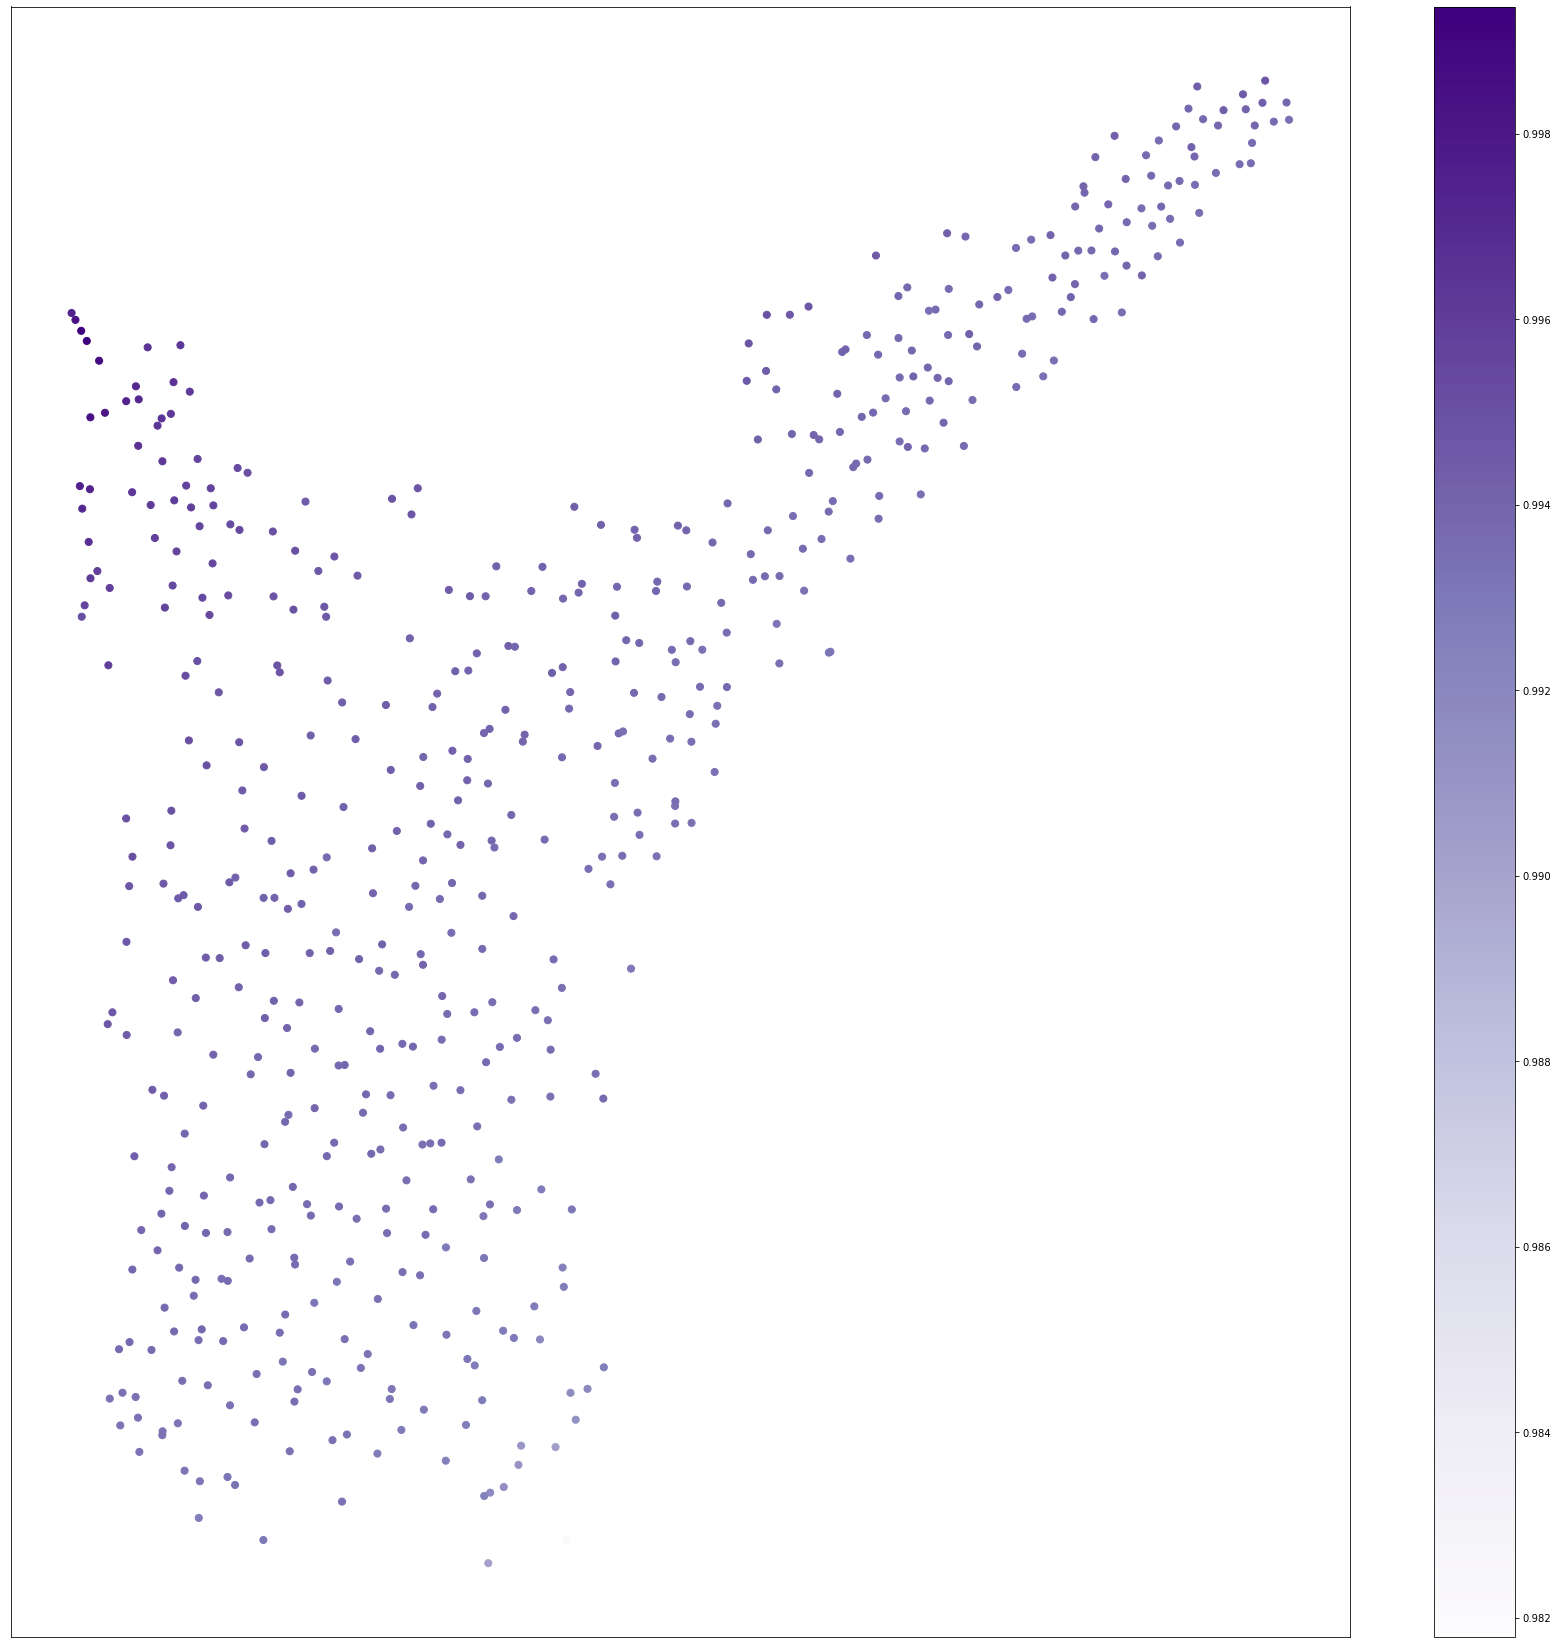

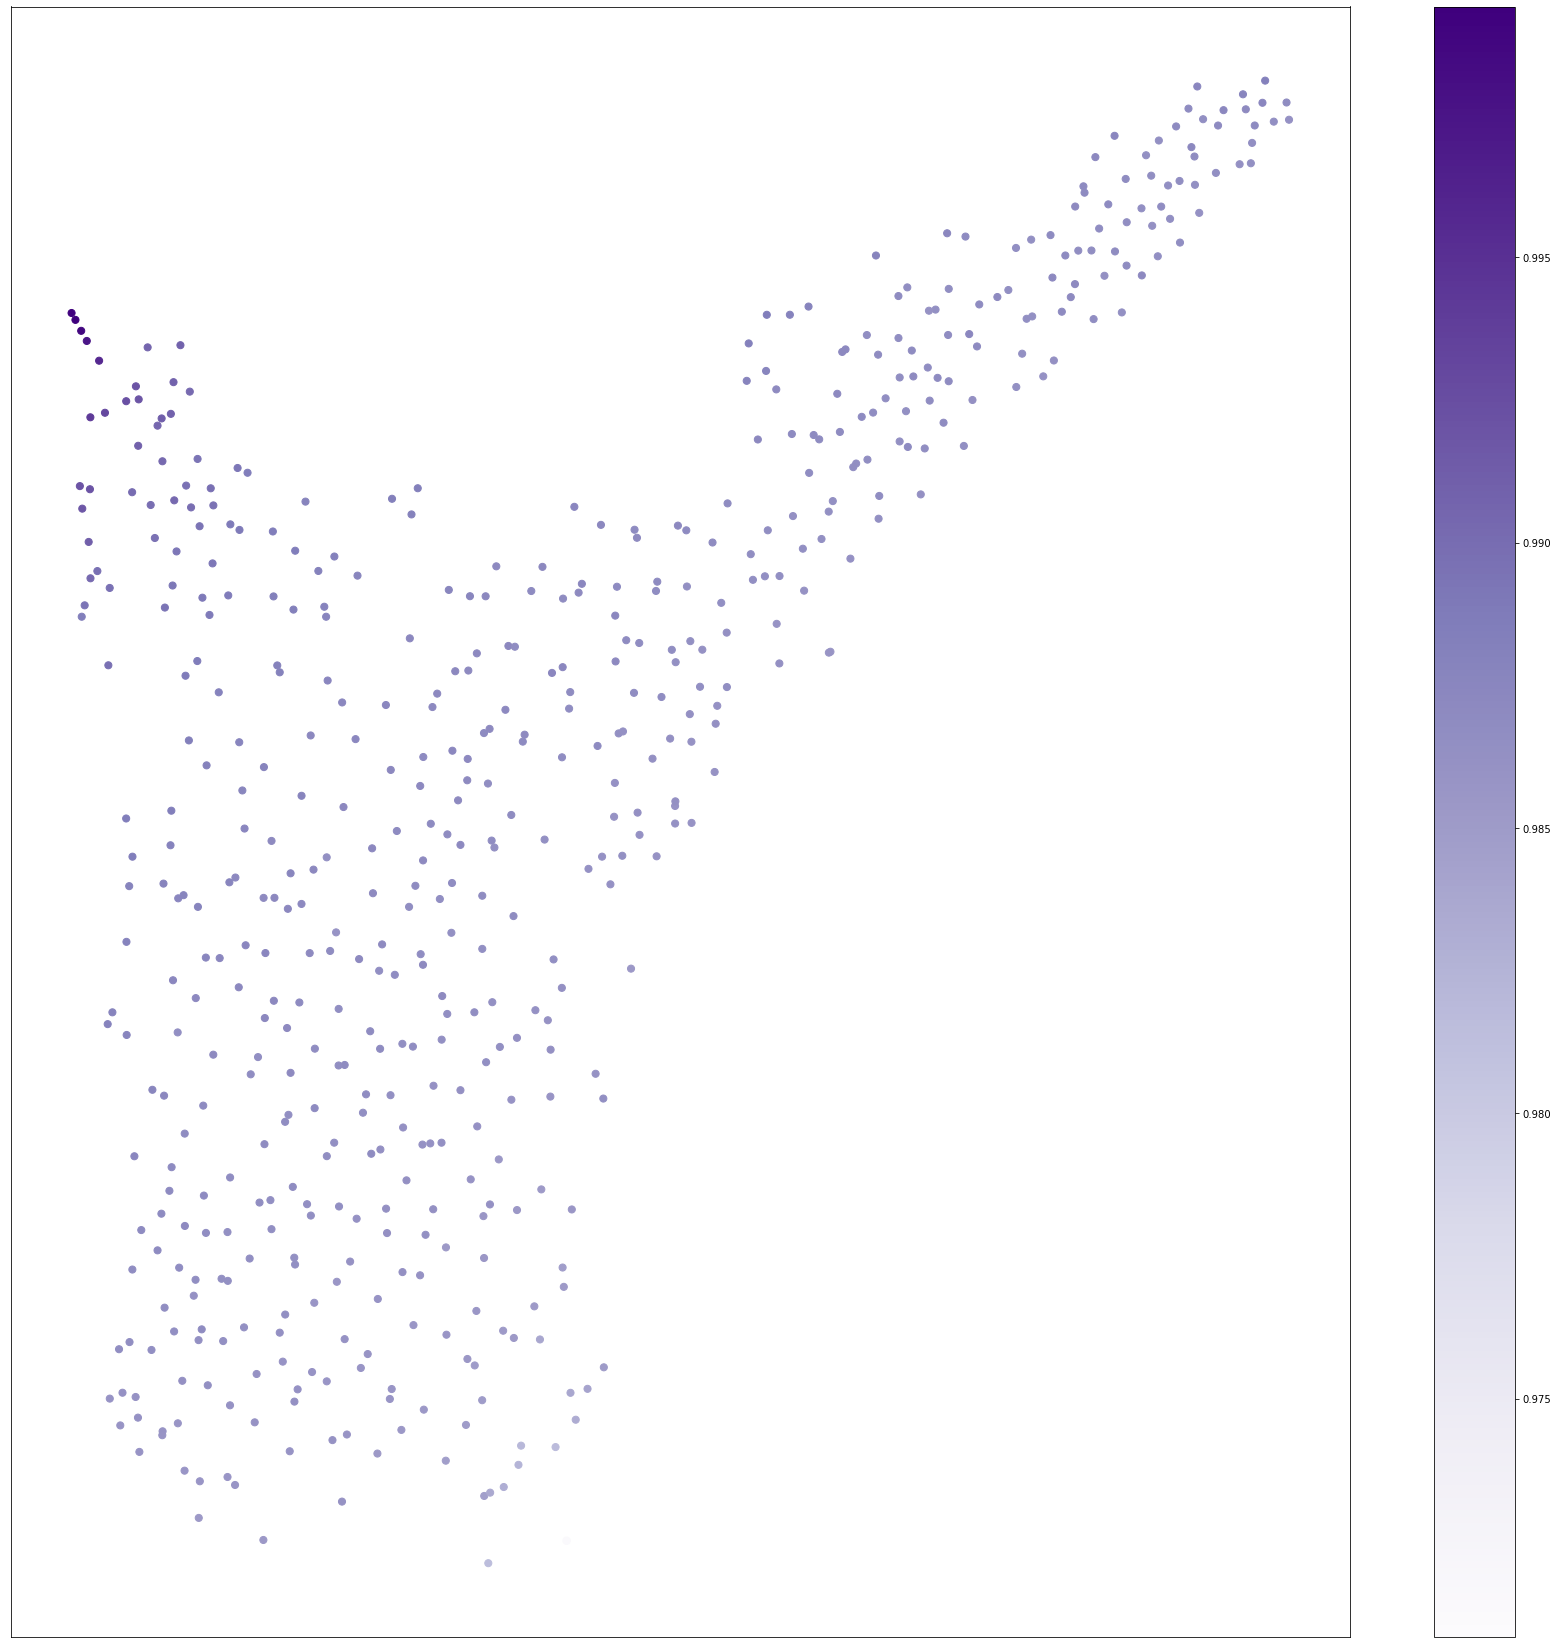

In [19]:
infile='./data/electrolyte/相关度/cathode.csv'
outfile='./data/electrolyte/图片/cathode.jpg'
cathode = Feature(infile,outfile)

infile='./data/electrolyte/相关度/anode.csv'
outfile='./data/electrolyte/图片/anode.jpg'
anode = Feature(infile,outfile)

infile='./data/electrolyte/相关度/electrolyte.csv'
outfile='./data/electrolyte/图片/electrolyte.jpg'
electrolyte = Feature(infile,outfile)

infile='./data/electrolyte/相关度/battery.csv'
outfile='./data/electrolyte/图片/battery.jpg'
battery = Feature(infile,outfile)

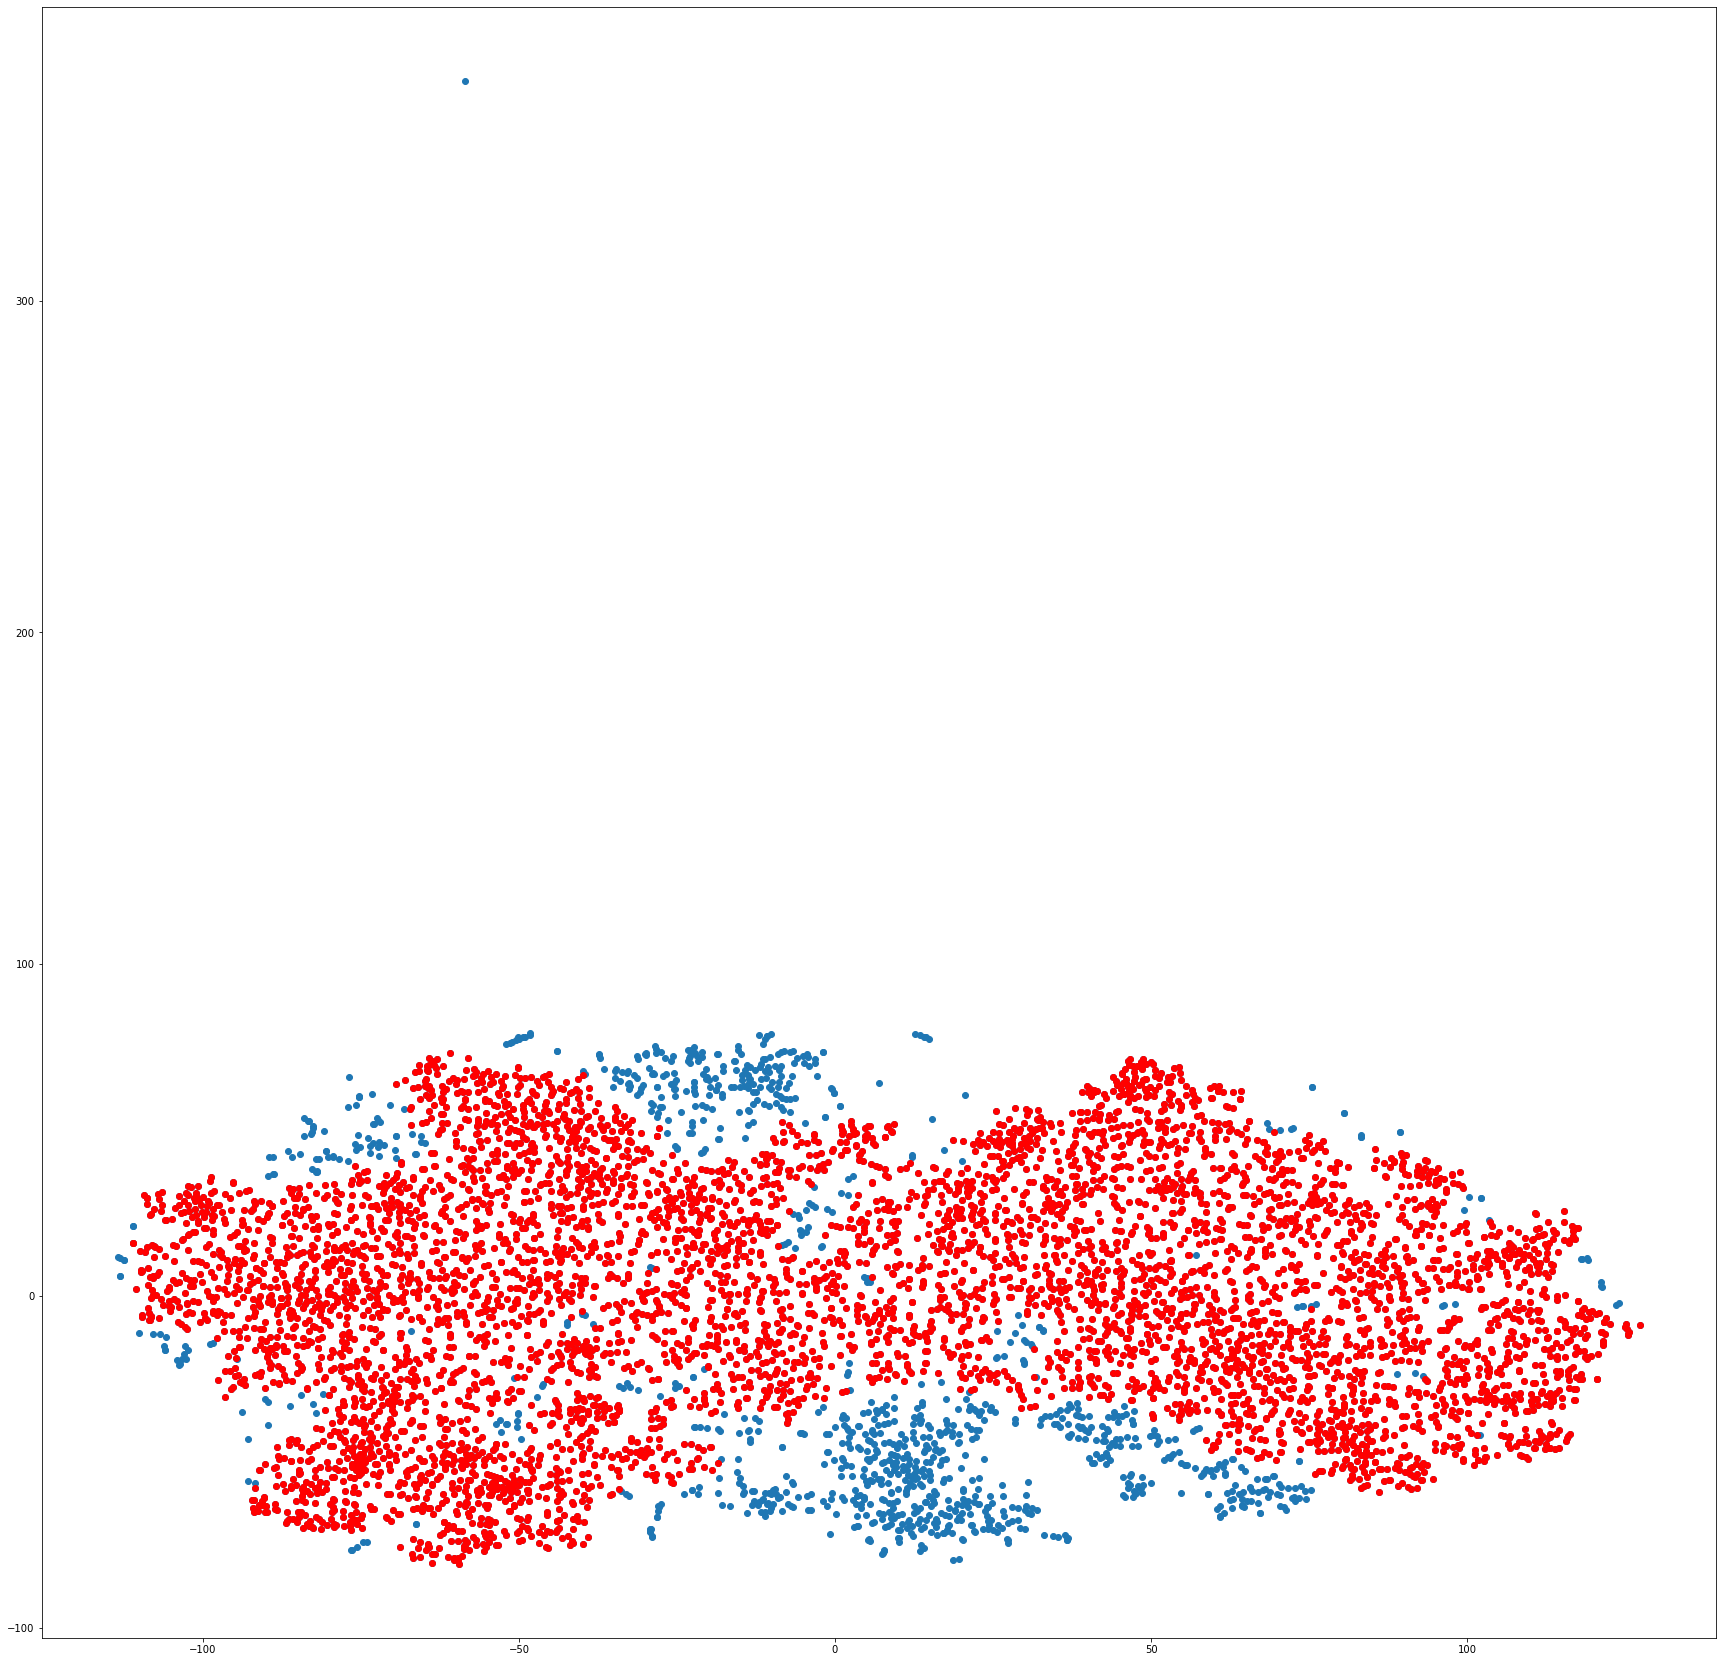

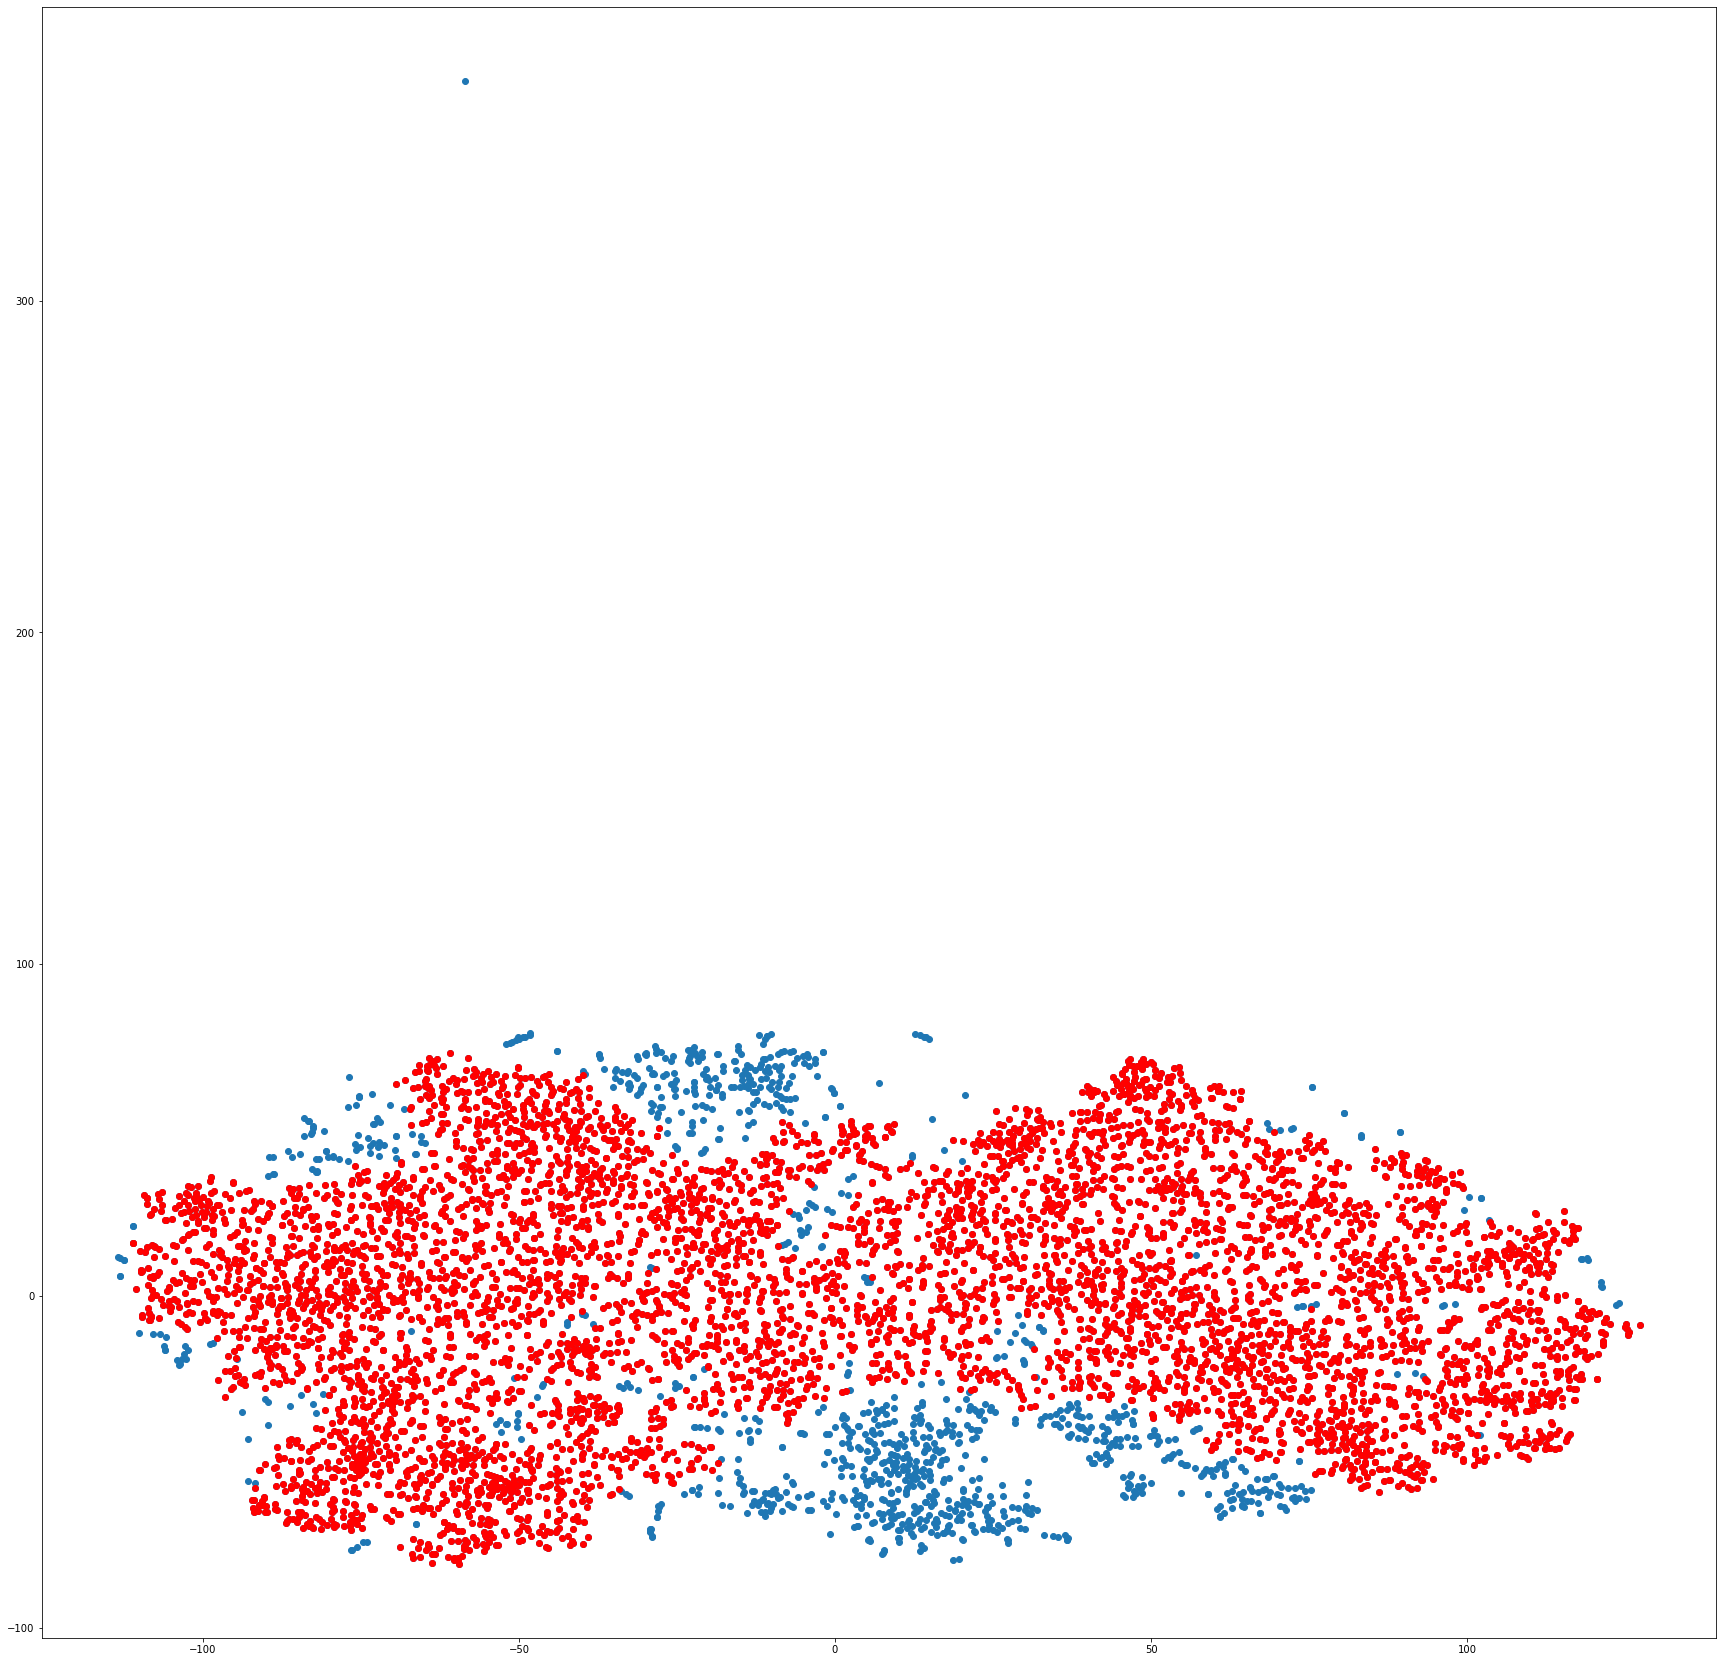

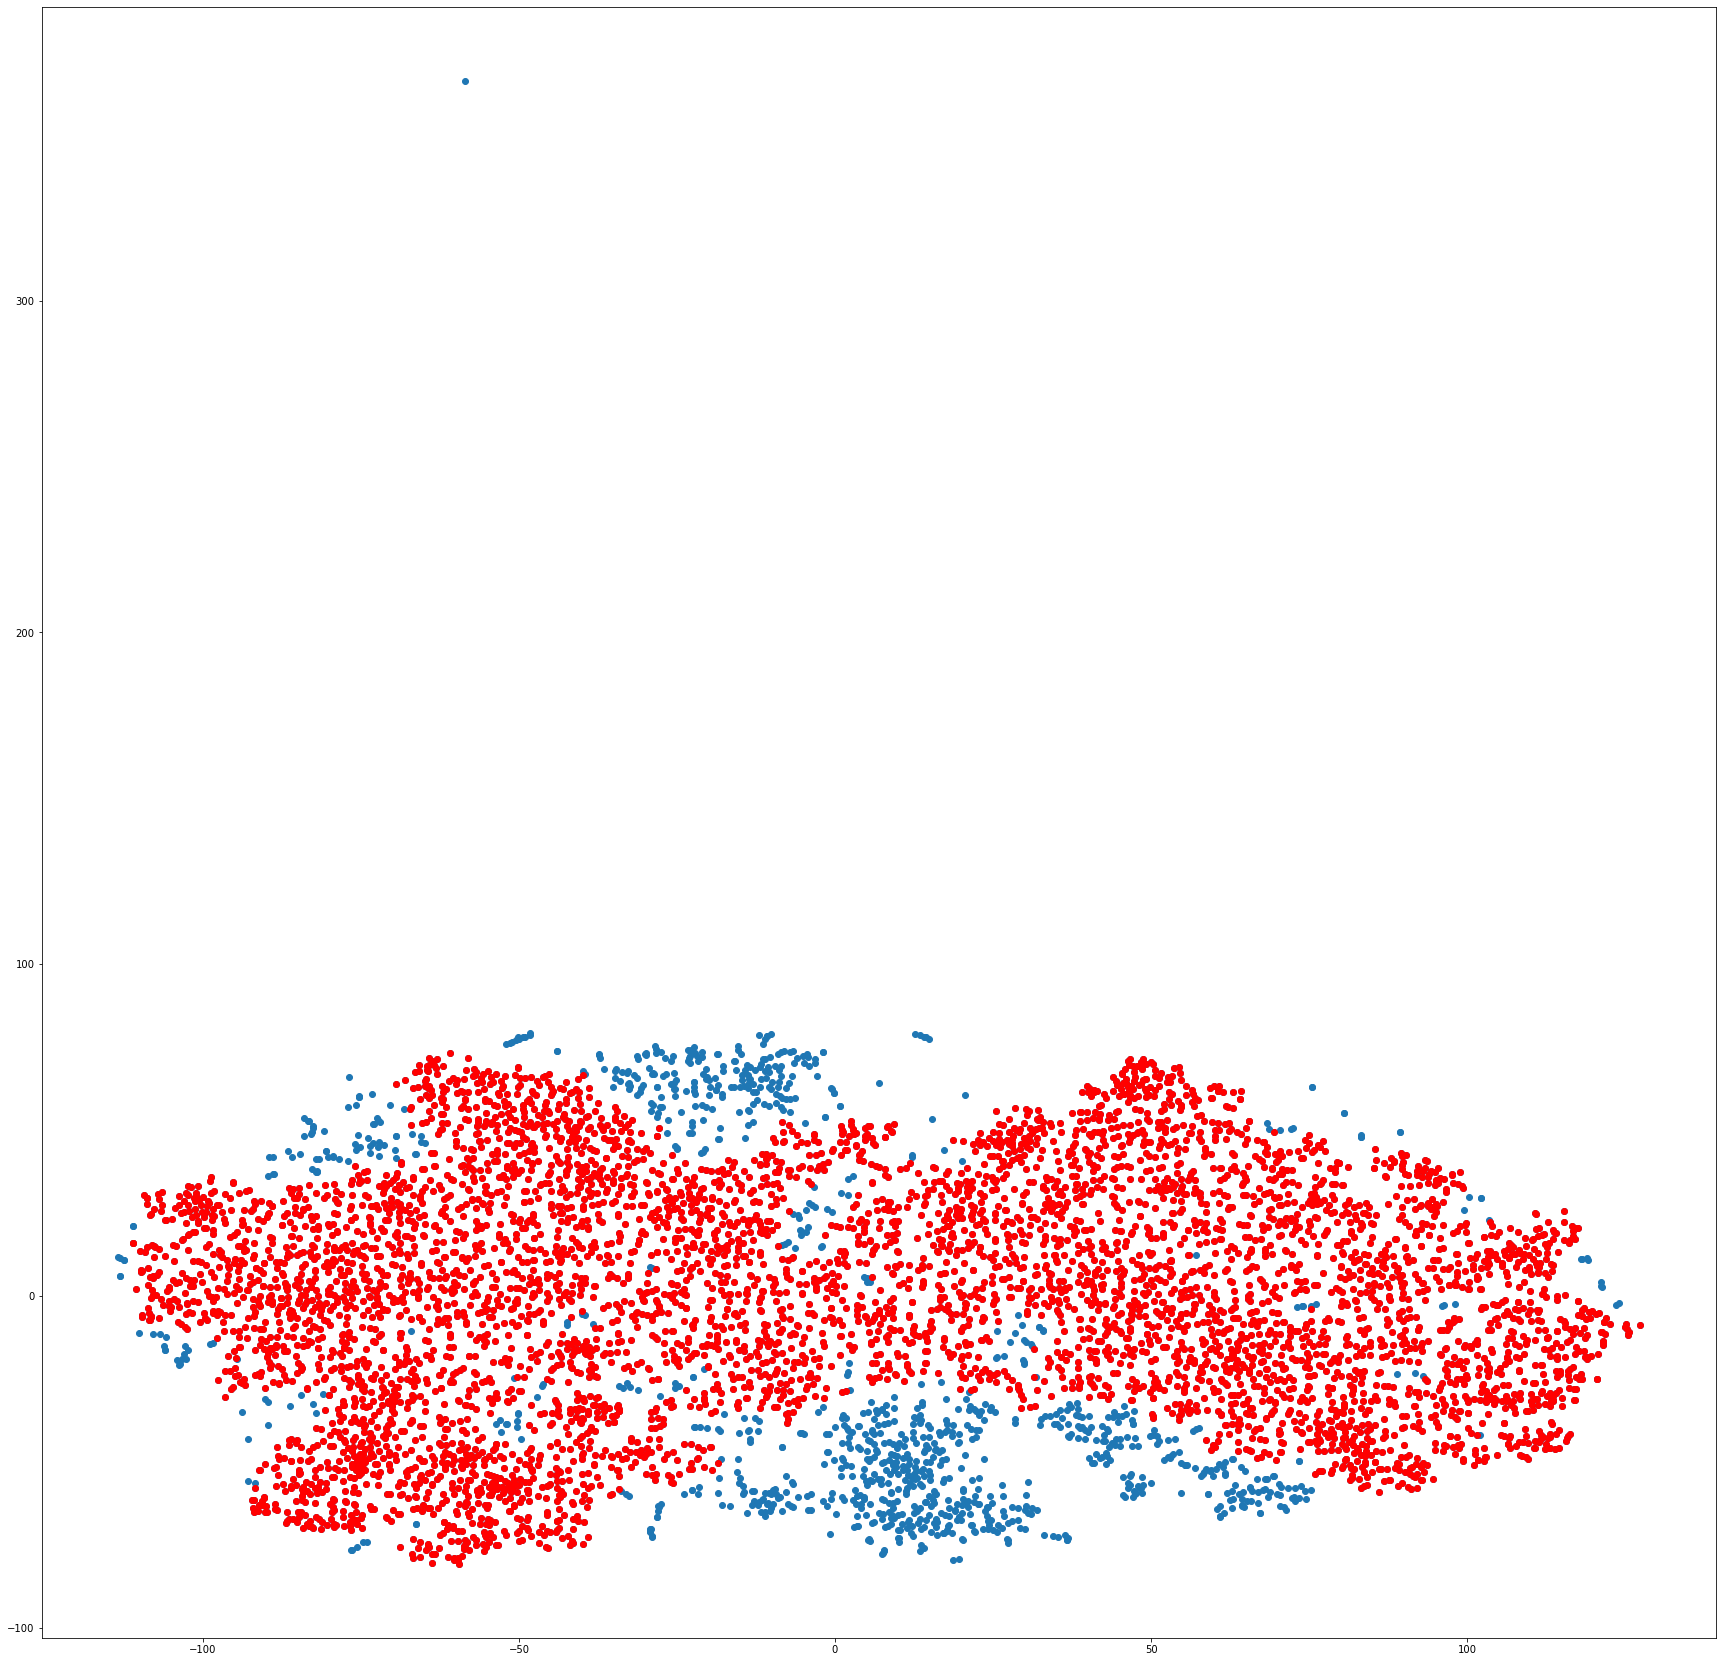

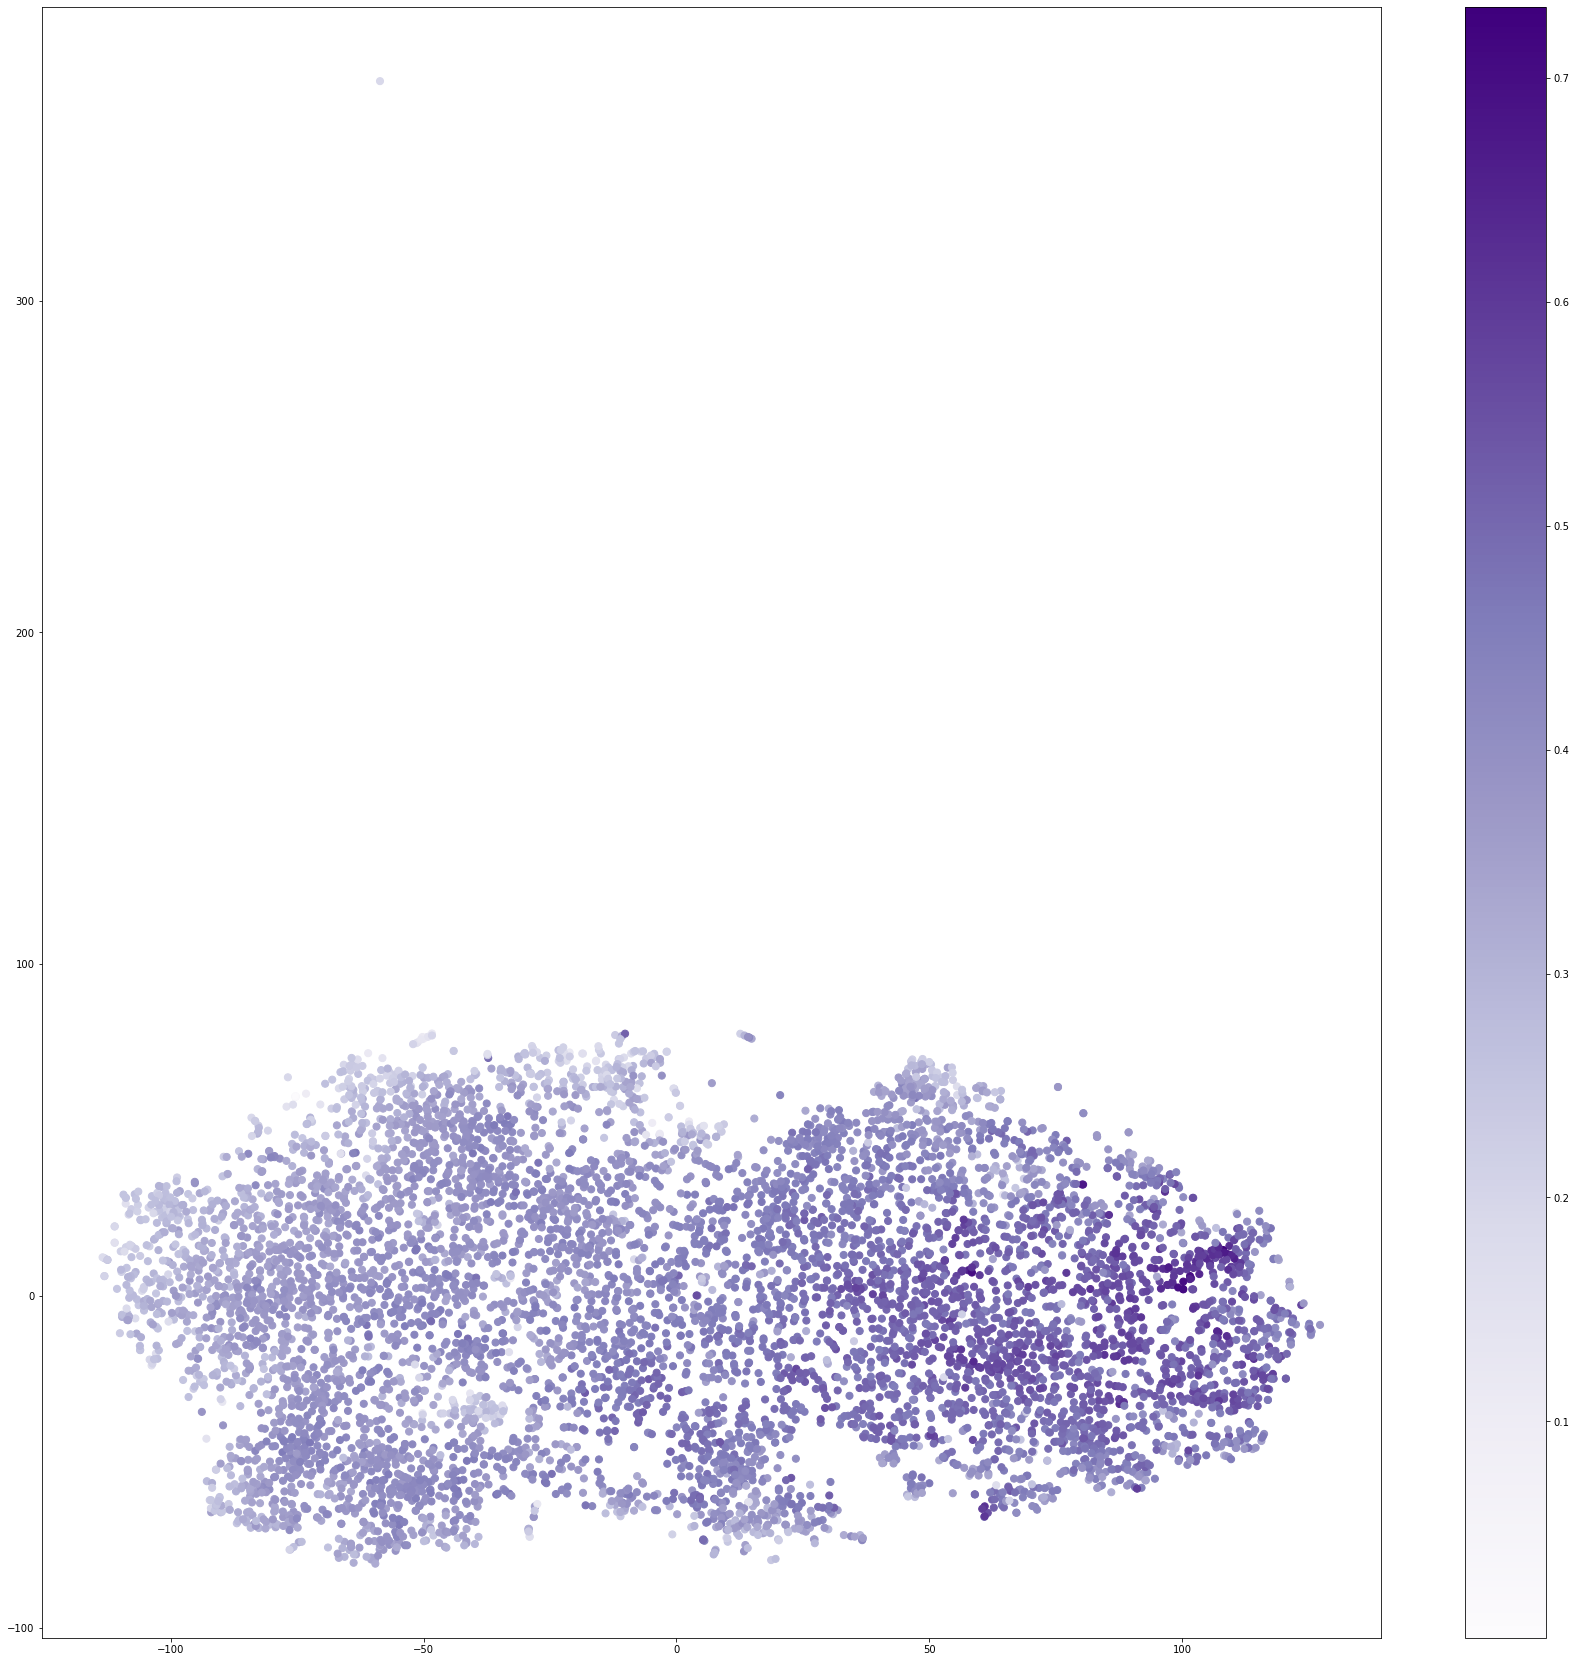

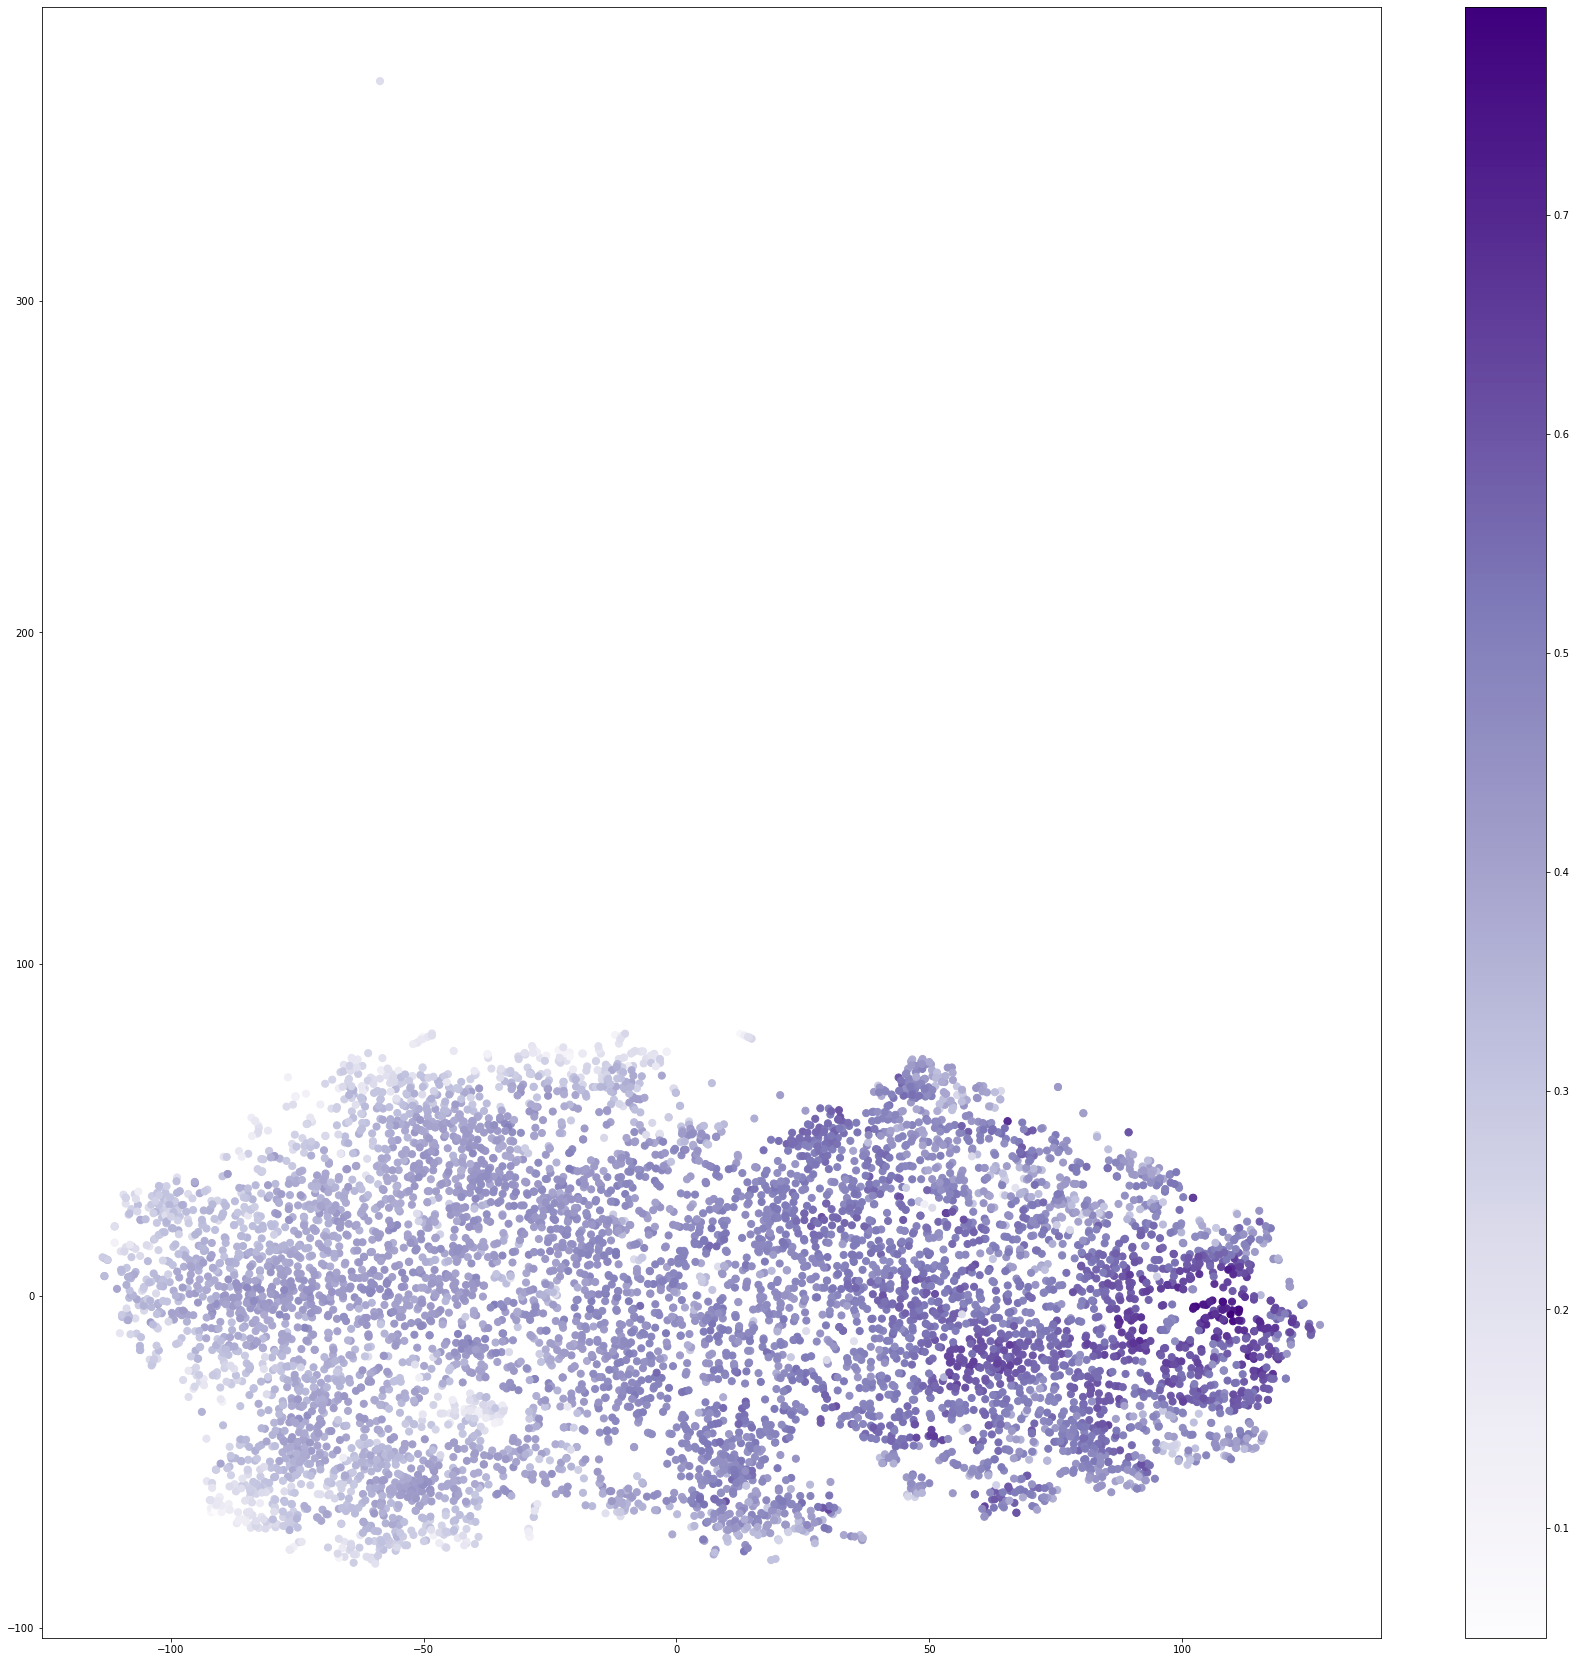

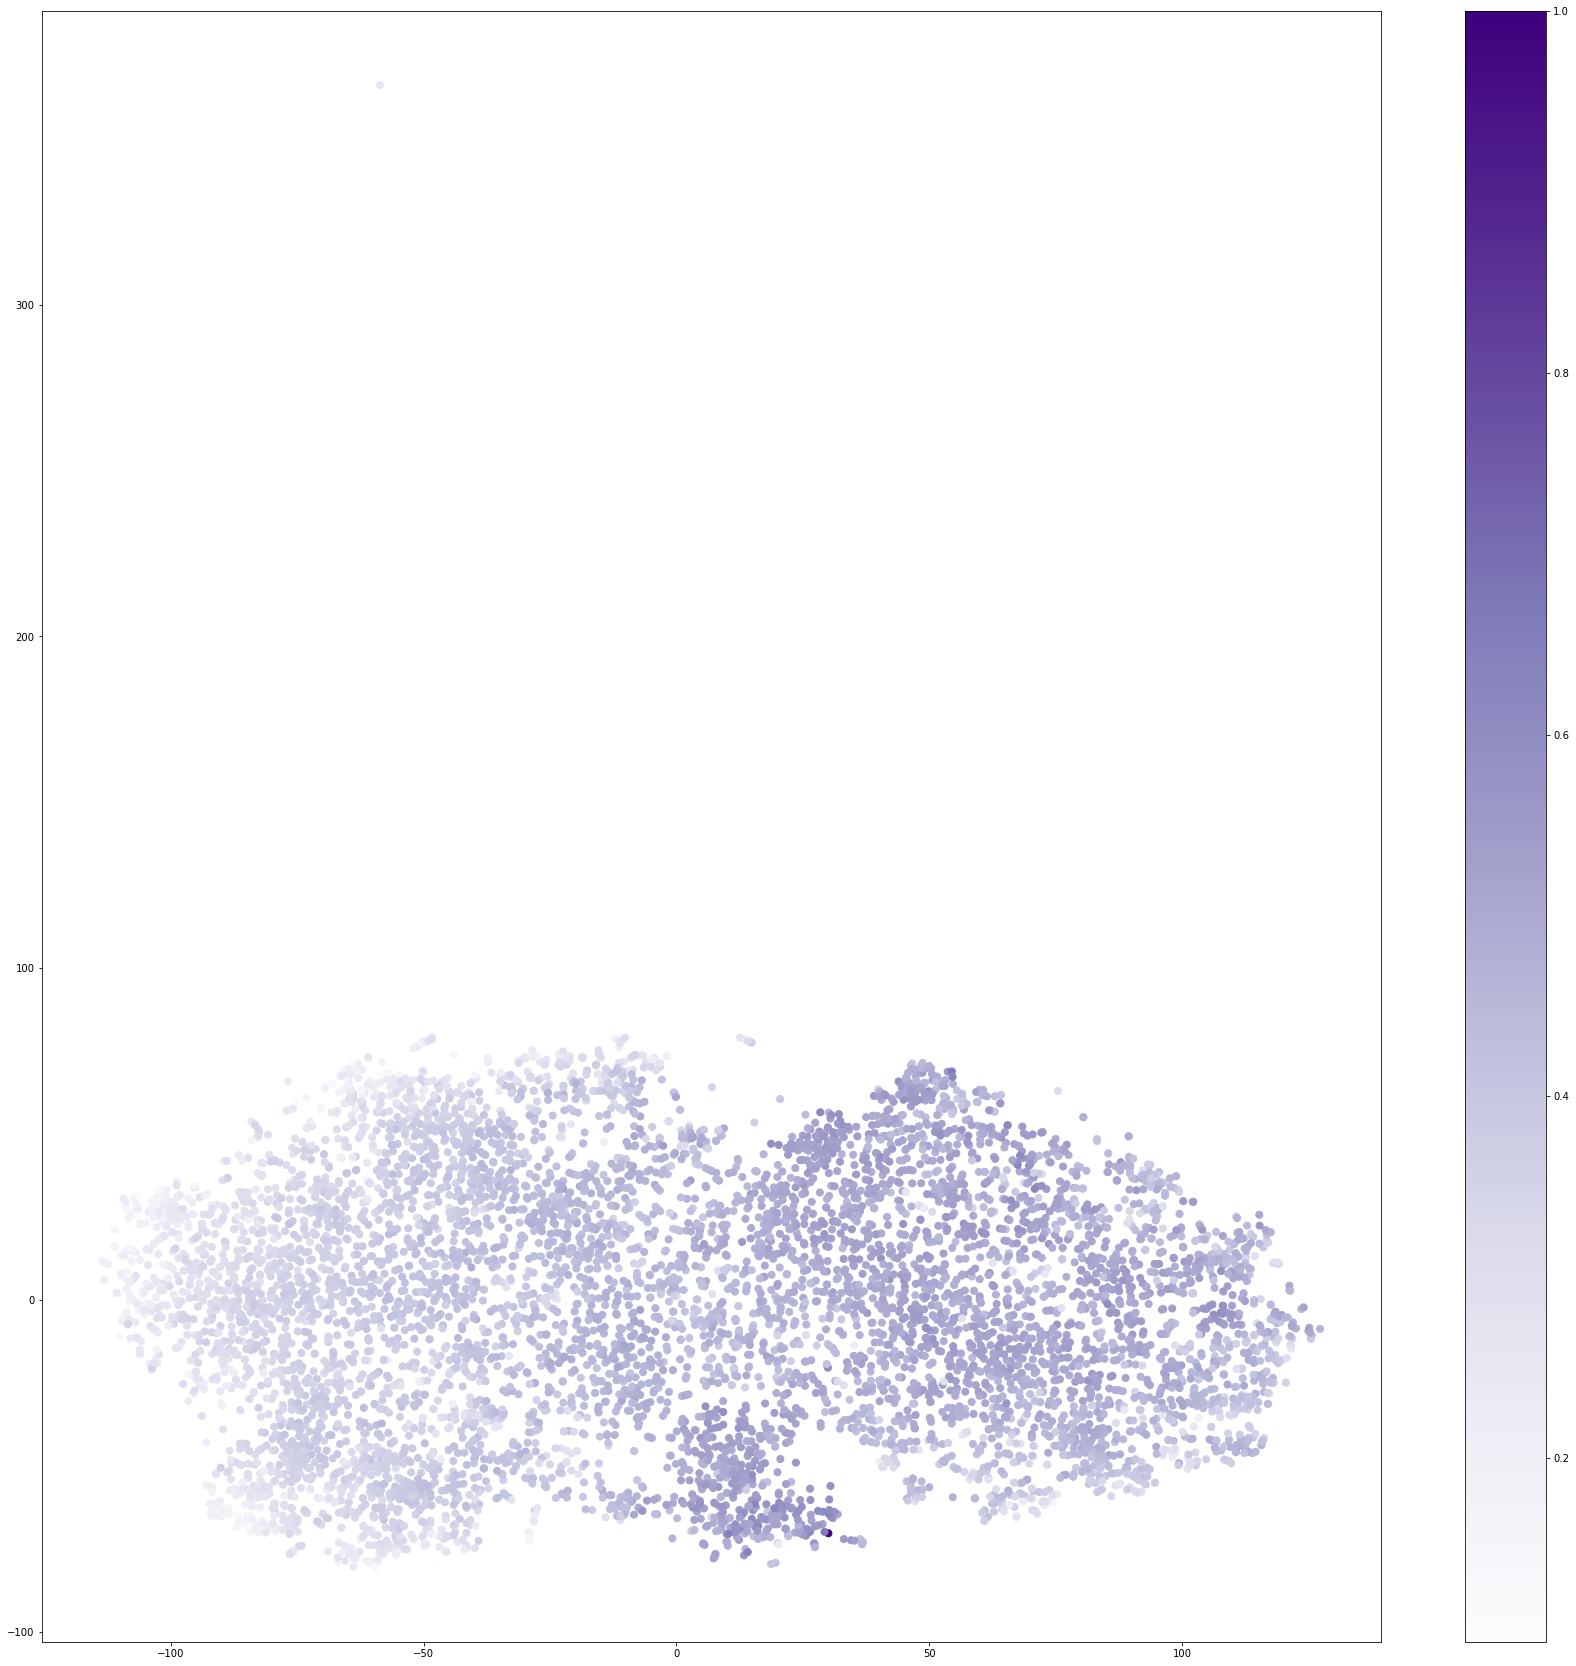

In [89]:
outfile='./data/C/图片/C2H4.jpg'
C2H4 = Relevance('C2H4',outfile) 

outfile='./data/C/图片/BaTiO3.jpg'
BaTiO3 = Relevance('BaTiO3',outfile)

outfil='./data/C/图片/PbTe.jpg'
PbTe = Relevance('PbTe',outfil)

infile='./data/C/相关度/capacitance.csv'
outfile='./data/C/图片/capacitance.jpg'
capacitance = Feature(infile,outfile)

infile='./data/C/相关度/photovoltaic.csv'
outfile='./data/C/图片/photovoltaic.jpg'
photovoltaics = Feature(infile,outfile)

infile='./data/C/相关度/organic.csv'
outfile='./data/C/图片/organic.jpg'
organic = Feature(infile,outfile)